## **Problem Statement**

### Business Context

News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the huge volume of news and opinions from a wide variety of sources, investors and financial analysts struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, our business aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. We have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

Our Data Science and AI team has been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower our client  financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Installing and Importing Necessary Libraries**

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import the mdates module
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
      # from sklearn.ensemble import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # for splitting data

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# to load the natural language toolkit
import nltk
import re
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer      # to perform stemming



# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/H', force_remount=True)

Mounted at /H


In [ ]:
%cd /H/My Drive/AIML Work/Project - Stock Market News Sentiment Analysis and Summarization

/H/My Drive/AIML Work/Project - Stock Market News Sentiment Analysis and Summarization


In [ ]:
news_0 = pd.read_csv("stock_news.csv") # Read the CSV file.
news_1 = news_0.copy() #Preserve Original & create a copy of the data

## **Data Overview**

In [ ]:
news_1.head(20)   # Show the first 20 rows of the dataset

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1
5,2019-01-02,Apple CEO Tim Cook discussed the company's Q1 ...,41.740002,42.244999,41.482498,40.246914,130672400,0
6,2019-01-02,Roku Inc has announced plans to offer premium...,41.740002,42.244999,41.482498,40.246914,130672400,1
7,2019-01-02,Wall Street saw modest gains on Wednesday but...,41.740002,42.244999,41.482498,40.246914,130672400,-1
8,2019-01-02,Apple's fiscal first quarter revenue came in ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
9,2019-01-02,Apple Inc. lowered its quarterly sales foreca...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
news_1.tail(20)   # Show the last 20 rows of the dataset

,Date,News,Open,High,Low,Close,Volume,Label
329,2019-04-23,This news article reports that India's ban on...,51.107498,51.937500,50.974998,50.361782,93292000,-1
330,2019-04-24,"LG Electronics, one of the world's top three ...",51.840000,52.119999,51.762501,50.284119,70162400,-1
331,2019-04-24,Silicon Valley ethicists Tristan Harris and A...,51.840000,52.119999,51.762501,50.284119,70162400,1
332,2019-04-24,ASM International beat first quarter expectat...,51.840000,52.119999,51.762501,50.284119,70162400,0
333,2019-04-24,The Indian state court has lifted a ban on th...,51.840000,52.119999,51.762501,50.284119,70162400,0
334,2019-04-24,Wall Street experienced muted trading on Wedn...,51.840000,52.119999,51.762501,50.284119,70162400,0
335,2019-04-25,"In a legal dispute, Spotify has agreed to rem...",51.707500,51.939999,51.279999,49.827774,74172800,-1
336,2019-04-26,"Sony, the Japanese technology giant, announce...",51.224998,51.250000,50.529999,49.589897,74596400,0
337,2019-04-29,Spotify reported better-than-expected Q1 reve...,51.099998,51.492500,50.965000,49.665138,88818800,1
338,2019-04-29,The S&P 500 reached a new intraday record hig...,51.099998,51.492500,50.965000,49.665138,88818800,1


### **Checking the shape and type of of the data**

In [ ]:
news_1.shape      # show dimensionality of data

(349, 8)

In [ ]:
news_1.info()     # show data types coded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


#### NOTES:
- Data has 349 records in 8 columns
- Date and news coded as strings
- Everything else is float or integer

#### SUGGESTIONS:
- recode Date from object to datetime  format

In [ ]:
news_1['Date'] = pd.to_datetime(news_1['Date'])  # to convert 'Date' var to datetime format.

### **Checking for missing values**

In [ ]:
news_1.isnull().sum() # Show if there are any missing values in the data

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


#### NOTES:
- No missing values!

### **Checking data for any duplicated records**

In [ ]:
news_1.duplicated().sum()     # checking for duplicate values

0

#### NOTES:
- No duplicated records detected!

### **Checking distribution of News length in order to detect incomplete, improperly truncated, or extremely short & meaningless news**

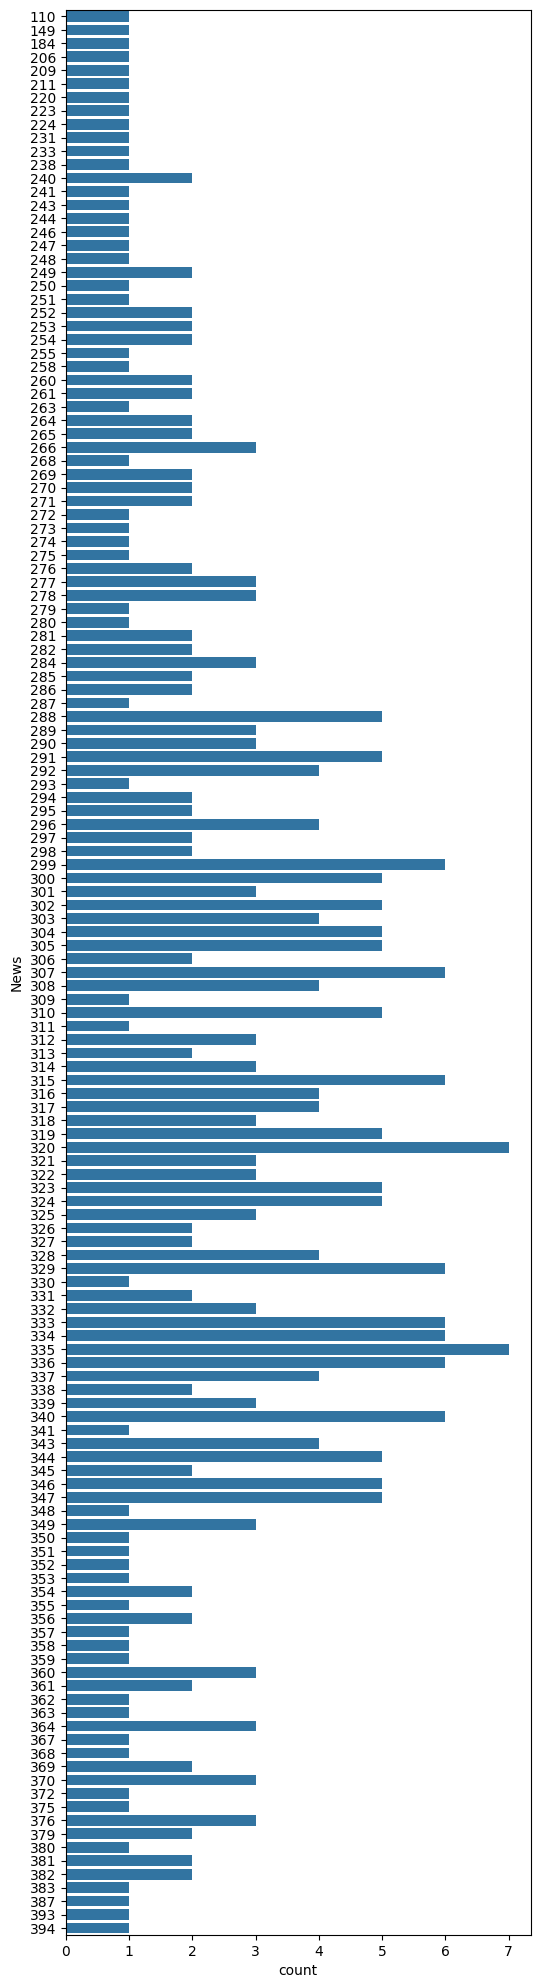

In [ ]:
plt.figure(figsize=(6, 25))  # Adjust the dimensions of the chart
sns.countplot(data=news_1, y=news_1['News'].apply(len));    # show the chart with counts lenghts of news
# Here we are not intrested in the shape of this disctibution line but in extreme tails of this distribution

#### NOTES:
- there are no extremely short / incomplete news with the shortest one is at 110 chars length


#### SUGGESTIONS:
- Check 5 shortest news in order to ensure their meanigfulness / usability

In [ ]:
pd.set_option('display.max_colwidth', None)     # Set the 'display.max_colwidth' option to None to show the full string
news_1.sort_values(by=['News'], key=lambda col: col.str.len()).head(5)      # Sort and display the news_1.head(5)

,Date,News,Open,High,Low,Close,Volume,Label
251,2019-03-19,"Tesla's CEO Elon Musk faces SEC scrutiny again for tweets without pre-approval, causing a slip in TSLA stock.",47.087502,47.247501,46.480000,45.276569,126585600,0
114,2019-01-22,"IBM's stock price increased after hours due to better-than-expected earnings and revenue, with its cloud computing business contributing positively.",39.102501,39.182499,38.154999,37.051727,121576000,0
200,2019-02-15,"NVIDIA's stock price surged in premarket trade, up by 8.06% at 8:06 AM ET or 13:06 GMT, following the company's forecast for better-than-expected sales during the current fiscal year.",42.812500,42.924999,42.437500,41.366173,98507200,1
194,2019-02-13,"Apple significantly ramped up its self-driving car testing in 2018, recording tens of thousands of miles versus just hundreds of miles in 2017, as per data from the California Department of Motor Vehicles.",42.847500,43.119999,42.480000,41.307930,89960800,-1
255,2019-03-21,"Apple's stock price increased by 4.01 to trade at $195.67 on Thursday's NASDAQ session, with a trading volume of 30.89 million shares. The stock fluctuated between $189.81 and $195.70 during the day, reaching",47.505001,49.082500,47.452499,47.354347,204136800,-1


#### NOTES:
- Even the 5 shortest news are meaningful

#### SUGGESTIONS:
- No internvention like news / records deletion is needed

## **Exploratory Data Analysis**

### **Checking the statistical summary**

In [ ]:
news_1.describe() # Show statistical summary of the data

,Date,Open,High,Low,Close,Volume,Label
count,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
mean,2019-02-16 16:05:30.085959936,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
min,2019-01-02 00:00:00,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,2019-01-14 00:00:00,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,2019-02-05 00:00:00,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,2019-03-22 00:00:00,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000
max,2019-04-30 00:00:00,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000
std,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119


### **Univariate Analysis**

### 'Label' variable descriptives

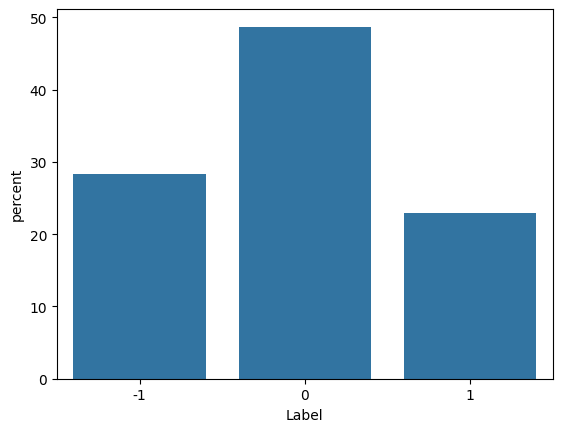

In [ ]:
sns.countplot(data=news_1, x="Label", stat="percent");

#### NOTES:
- Balanced, realistic distribution of news modality (positve/neutral/negative)
- Neutral at ~50%
- Positive and Negative at ~24-27% each

### 'Volume' variable descriptives

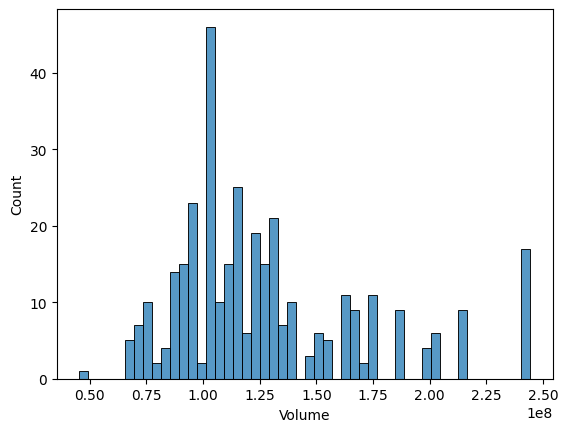

In [ ]:
sns.histplot(news_1, x='Volume', bins=50);     # show distribution of Volume

#### NOTES:
- Volume ranges from ~40 mln to ~240 mln with average at around ~125 mln (from previous descriptives and this chart) and with mode at about ~100 mln per day (from this chart)
- no obvuious outliers

#### SUGGESTIONS:
- explore how this volume changes over time for any treands or patterns

### 'Price' variable descriptives

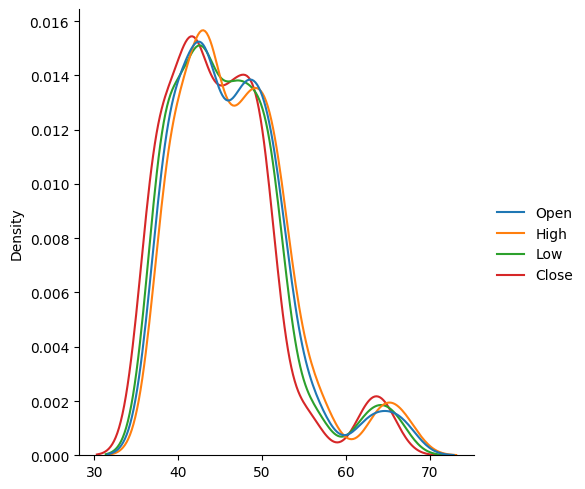

In [ ]:
# Plot a density plot of all prices (Open / High / Low / Close)
sns.displot(data=news_1[['Open','High', 'Low', 'Close' ]], kind="kde", palette="tab10");
            # stock[['_____']], kind="kde", palette="tab10");

#### NOTES:
- looks like 3 peaks of 3 separate distributions cobined for all 4 type of prices: at ~42 dollars, at ~48 dollars and at ~ 64 dollars
- picture is consitent with a possbility of a hidden categorial covariate affecting price significantly - like market 1-2-3 or weekday type 1-2-3 or season 1-2-3 or period of time before-during-after a certain event
- given this is about some specific stock of some specific company, this covraite cannot be company 1-2-3
- but still it could be different type of shares or stock of this specific company OR different batch size / volume sold

#### SUGGESTIONS:
- Investigate bivariate relation of price to all DateTime, Weekday, Season and Volume
- Use Close Price for this investigation as less noisy

### **Bivariate Analysis**

### Explore temporal relationship of 'Price' to various forms of 'Date'

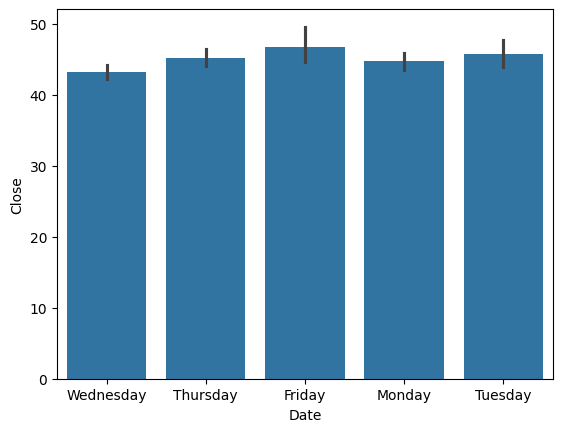

In [ ]:

# Show how 'Close' Price changed by days of a week sorted
sns.barplot(data=news_1, x=news_1['Date'].dt.day_name(), y='Close');

#### NOTES:
- insignificant fluctuations by weekdays = weak predictor
- range of fluctuations is not big enough to explain previously observed 3-peakedness in price distribution above
- Friday's prices are the highest and most volatile
- Wednesday's prices are lowest and least volatile

### SUGGESTIONS:
- Drop day-of-the-week considerations in the context of Price

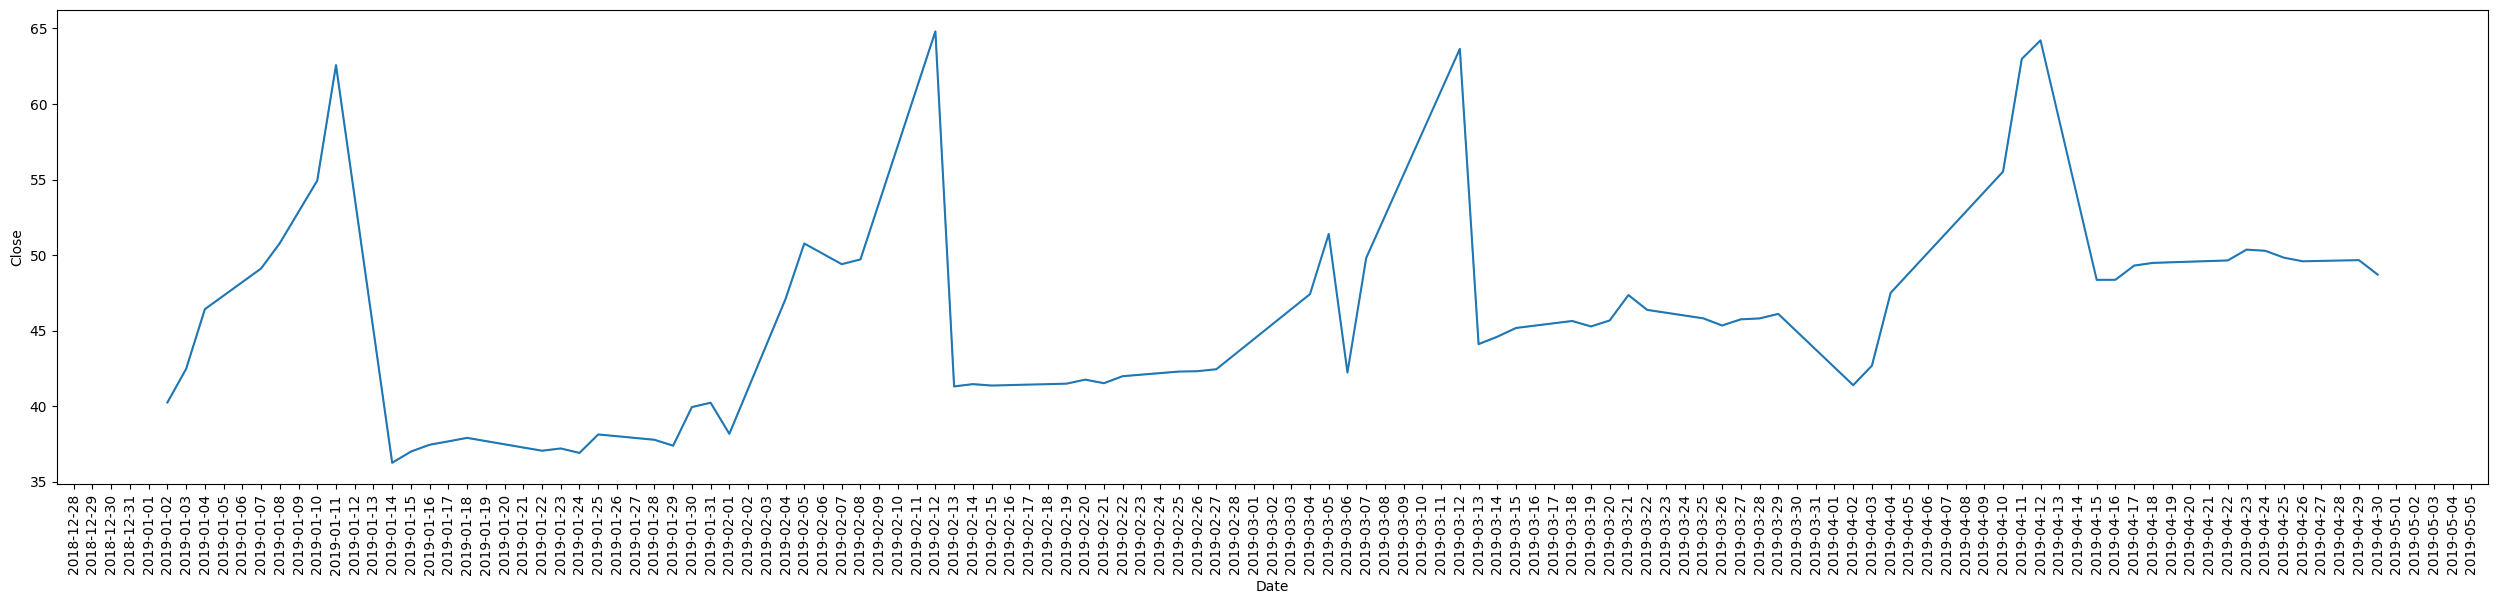

In [ ]:
plt.figure(figsize=(25, 6))     # Adjust the dimensions of the chart
plt.xticks(rotation=90)       # Rotate x-axis labels by 90 degrees

# Make x-axis ticks more frequent and detailed
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
plt.tight_layout()      # Adjust layout to prevent label cutoff
sns.lineplot(data=news_1, x='Date', y='Close');     # Show how 'Close' Price changed over linear time


### NOTES:
- Obvious growth-over-time patterns
- Weird monthly pattern with sharp peak/drop at about 12th day of every month

#### SUGGESTIONS:
- Overlay Volume in order to see if these fluctuations are volume-related

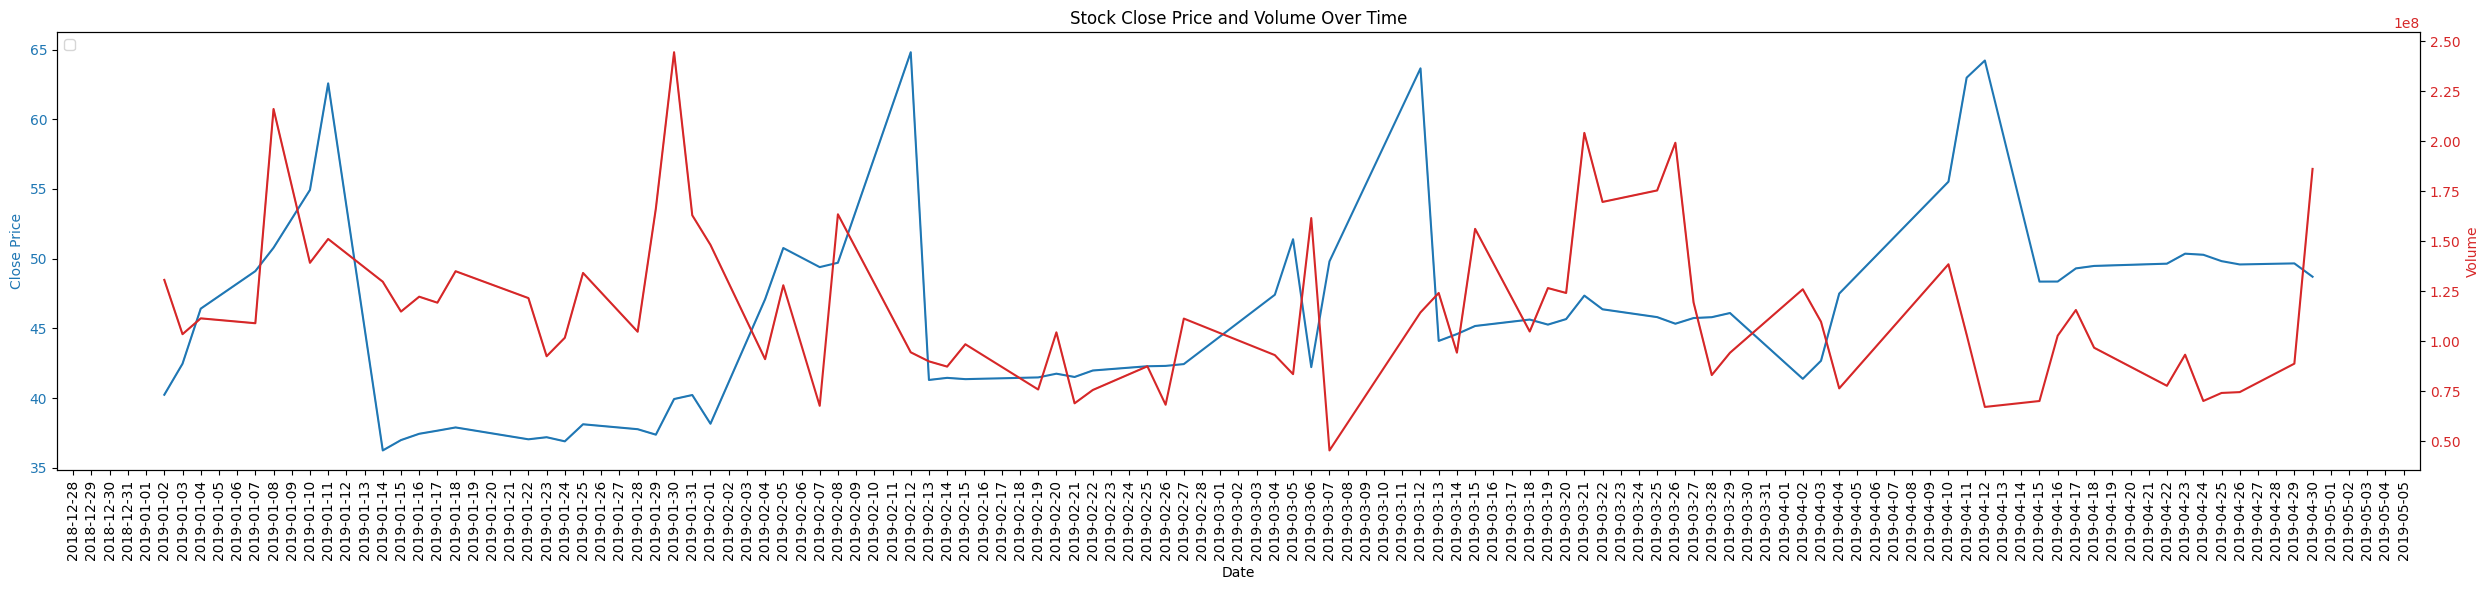

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 6))     # Adjust the dimensions of the chart
plt.xticks(rotation=90)       # Rotate x-axis labels by 90 degrees

# Plot Close price on primary axis
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color1)
line1 = sns.lineplot(data=news_1, x='Date', y='Close', ax=ax1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary axis for Volume
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Volume', color=color2)
line2 = sns.lineplot(data=news_1, x='Date', y='Volume', ax=ax2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)



# Make x-axis more detailed
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add title and adjust layout
plt.title('Stock Close Price and Volume Over Time')
plt.tight_layout()

# Optional: Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['Close', 'Volume'], loc='upper left')

#### NOTES:
- No obvious relation between Close price and Volume over time
- Observable pattern hints at possibility of small lag between Volume and Close Price at about 1-3 days

####SUGGESTIONS:
- Explore Price-Volume relationship at lag = 0, 1, 2, 3 days

Correlation between Close and Volume: -0.080


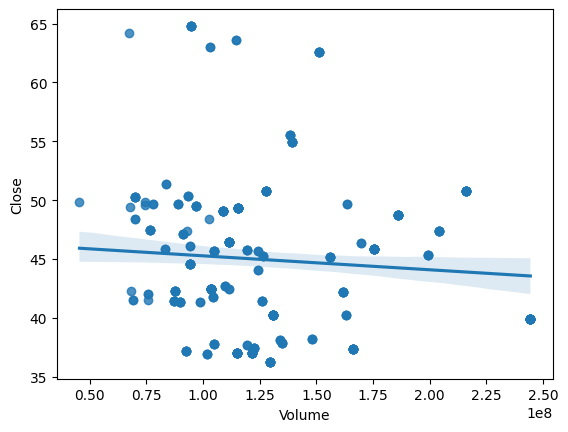

In [ ]:
# Show scatterplot between Close price and Volume at lag = 0 day; showing fit line and correlation
print(f"Correlation between Close and Volume: {news_1['Close'].corr(news_1['Volume']):.3f}")
sns.regplot(data=news_1, x='Volume', y='Close');

Correlation between Close and Volume (1 day lag): -0.071


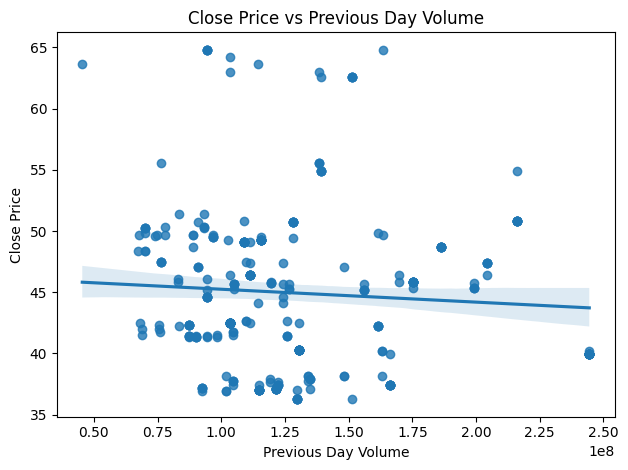

In [ ]:
# Show scatterplot between Close price and Volume at lag = 1 day; showing fit line and correlation

news_1['Volume_Lag1'] = news_1['Volume'].shift(1)     # Create lagged volume (shift by 1 day)
news_1_lag = news_1.dropna()      # Remove first row with NaN from shifting

# Calculate correlation with lagged volume
correlation_lag = news_1_lag['Close'].corr(news_1_lag['Volume_Lag1'])
print(f"Correlation between Close and Volume (1 day lag): {correlation_lag:.3f}")

# Create scatter plot with regression line
#plt.figure(figsize=(10, 6))
sns.regplot(data=news_1_lag, x='Volume_Lag1', y='Close')
plt.title('Close Price vs Previous Day Volume')
plt.xlabel('Previous Day Volume')
plt.ylabel('Close Price')
plt.tight_layout()


Correlation between Close and Volume (2 days lag): -0.050


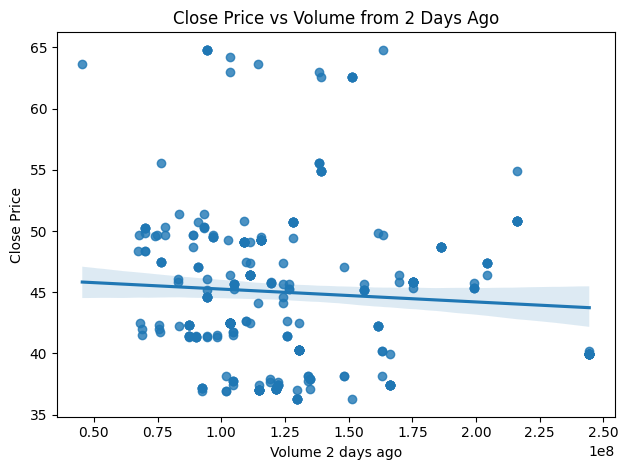

In [ ]:
# Show scatterplot between Close price and Volume at lag = 2 days; showing fit line and correlation

news_1['Volume_Lag2'] = news_1['Volume'].shift(2)     # Create lagged volume (shift by 1 day)
news_1_lag = news_1.dropna()      # Remove first row with NaN from shifting

# Calculate correlation with lagged volume
correlation_lag = news_1_lag['Close'].corr(news_1_lag['Volume_Lag2'])
print(f"Correlation between Close and Volume (2 days lag): {correlation_lag:.3f}")

# Create scatter plot with regression line
#plt.figure(figsize=(10, 6))
sns.regplot(data=news_1_lag, x='Volume_Lag1', y='Close')
plt.title('Close Price vs Volume from 2 Days Ago')
plt.xlabel('Volume 2 days ago')
plt.ylabel('Close Price')
plt.tight_layout()

Correlation between Close and Volume (3 days lag): -0.032


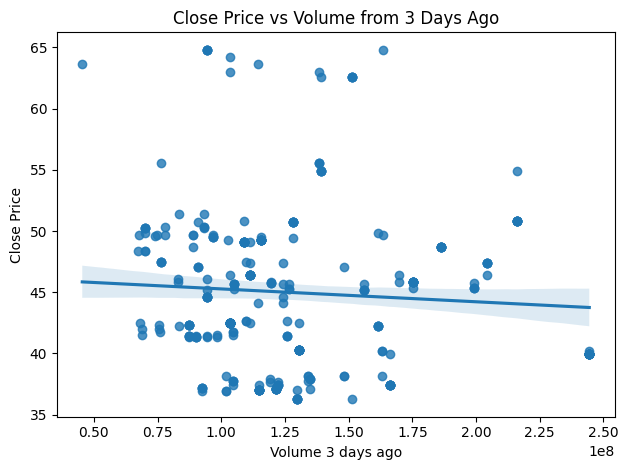

In [ ]:
# Show scatterplot between Close price and Volume at lag = 3 days; showing fit line and correlation

news_1['Volume_Lag3'] = news_1['Volume'].shift(3)     # Create lagged volume (shift by 3 days)
news_1_lag = news_1.dropna()      # Remove first row with NaN from shifting

# Calculate correlation with lagged volume
correlation_lag = news_1_lag['Close'].corr(news_1_lag['Volume_Lag3'])
print(f"Correlation between Close and Volume (3 days lag): {correlation_lag:.3f}")

# Create scatter plot with regression line
#plt.figure(figsize=(10, 6))
sns.regplot(data=news_1_lag, x='Volume_Lag1', y='Close')
plt.title('Close Price vs Volume from 3 Days Ago')
plt.xlabel('Volume 3 days ago')
plt.ylabel('Close Price')
plt.tight_layout()

#### NOTES:
- Hypotehsis about any lag between Volume and Close Price is not supported
- Correlations decrease with any / bigger lag

#### SUGGESTIONS:
- Do not cosnider controlling interaction between Volume and Price in modelling

### Explore relationship between Price and Label - temporal and overall

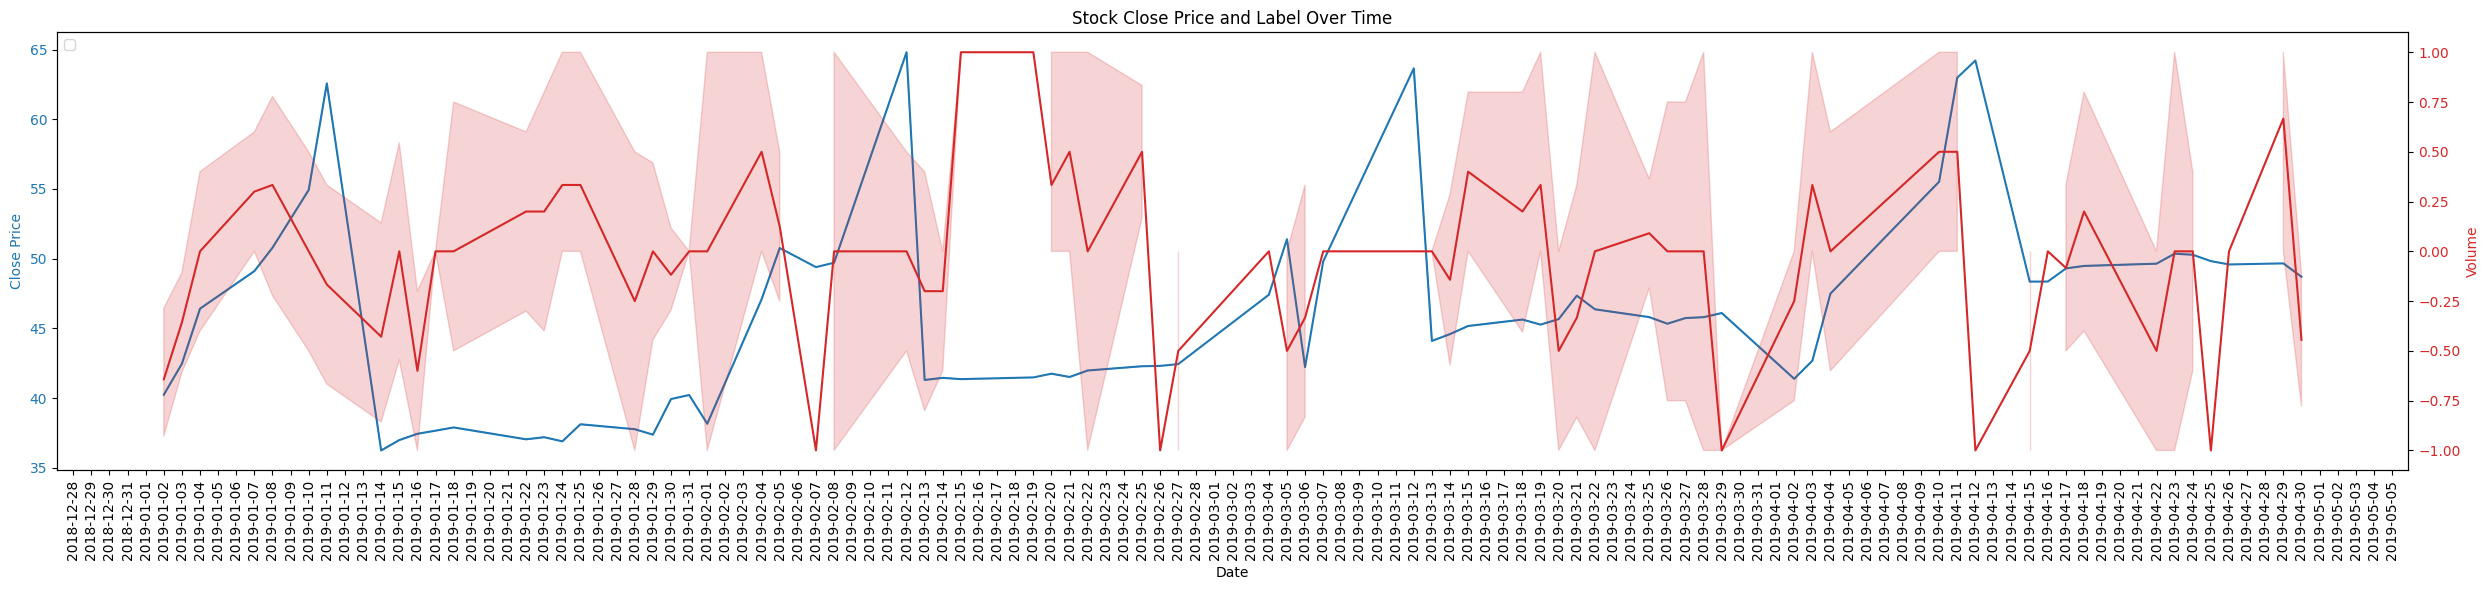

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 6))     # Adjust the dimensions of the chart
plt.xticks(rotation=90)       # Rotate x-axis labels by 90 degrees

# Plot Close price on primary axis
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color1)
line1 = sns.lineplot(data=news_1, x='Date', y='Close', ax=ax1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary axis for Label
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Volume', color=color2)
line2 = sns.lineplot(data=news_1, x='Date', y='Label', ax=ax2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)



# Make x-axis more detailed
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add title and adjust layout
plt.title('Stock Close Price and Label Over Time')
plt.tight_layout()

# Optional: Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['Close', 'Label'], loc='upper left')

#### NOTES:
- No obvious relationship over time
- Lagging not observed

#### SUGGESTIONS:
- Check just correlations of other price types with label

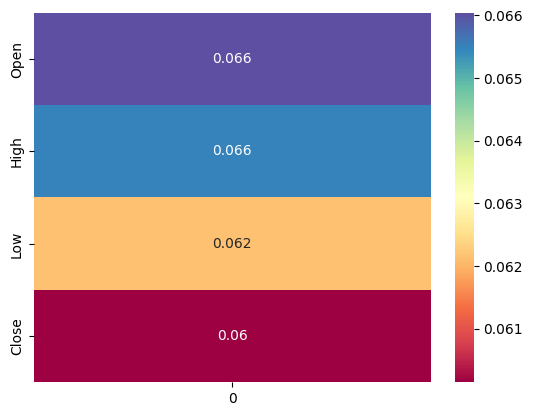

In [ ]:
# Show heatmap with coorelations between all prices and Label
sns.heatmap(news_1[['Open','High','Low','Close']].corrwith(news_1['Label']).to_frame(), annot=True, cmap='Spectral');


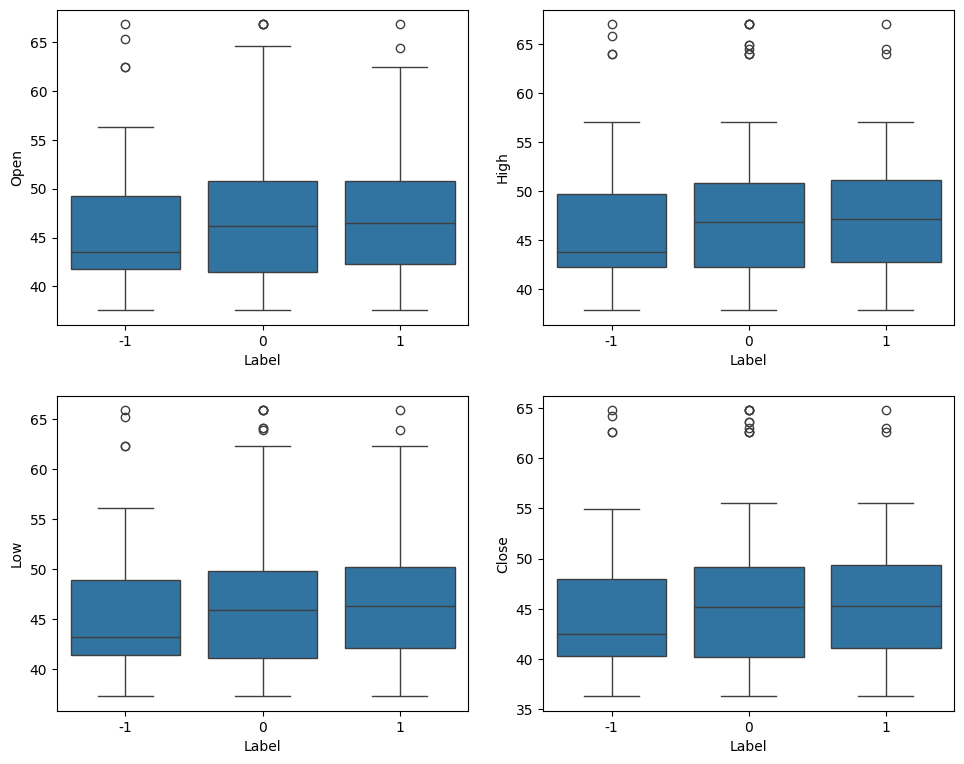

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=news_1, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

#### NOTES:
- Effect of existing Label (pre-classified Sentiment polarity) on Price is minimal and not significant "as-is" in this data
- Mysterious and yet unexplained monthly flashes & dips of Prices might be vastly increasing variance and therefore hindering any subtle relationships to non-significance

#### SUGGESTIONS:
- Explore Mysterious and yet unexplained monthly more

Text(279.59722222222223, 0.5, 'Price')

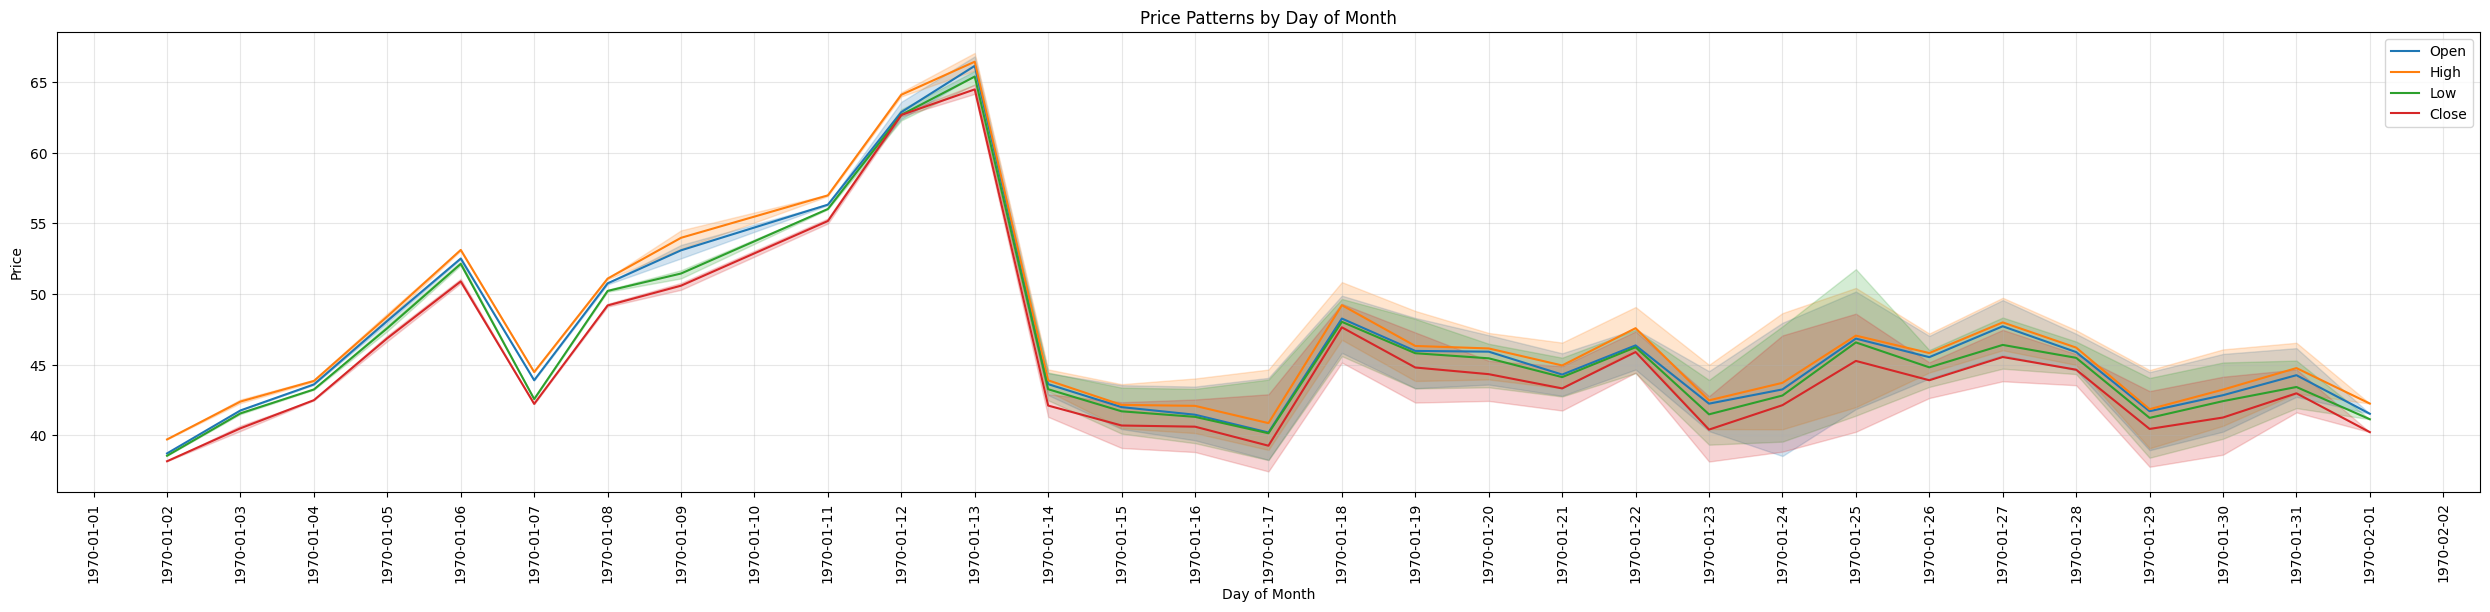

In [ ]:
news_1['Day'] = news_1['Date'].dt.day       # Extract day of month from Date
plt.figure(figsize=(25, 6))       # change Size of plot

# Plot all four prices
sns.lineplot(data=news_1, x='Day', y='Open', label='Open')
sns.lineplot(data=news_1, x='Day', y='High', label='High')
sns.lineplot(data=news_1, x='Day', y='Low', label='Low')
sns.lineplot(data=news_1, x='Day', y='Close', label='Close')

# Show every date on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)       # Rotate x-axis labels for better readability
plt.grid(True, alpha=0.3)     # Add grid for better readability
plt.tight_layout()          # Adjust layout to prevent label cutoff

# Customize the plot
plt.title('Price Patterns by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Price')

#### NOTES:
- Obviously some regular activity pattern happens and repeats on monthly basis
- Every month from day 1 to 14 prices follow a specific pattern and show less variance with that day of a month (less variance between months for  that day)
- In contrast, from day 15 to the end of month prices are more variable bewteen months
- Observed Picture suggest prices might be more receptive to news sentiment in the second half of month


#### SUGGESTIONS:
- Calucalte the above correlations seaprately for days 1-14 and 15-31

Correlations for Days 1-14:


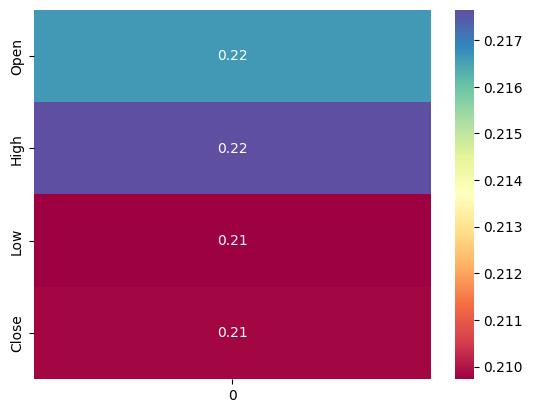

Correlations for Days 15-31:


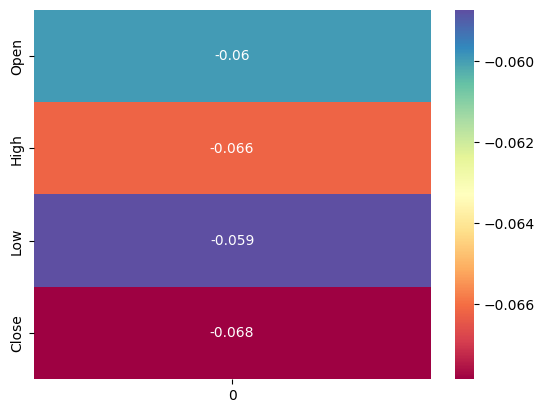

In [ ]:
# Create two separate dataframes for days 1-14 and 15-31
days_1_14 = news_1[news_1['Date'].dt.day <= 14].copy()
days_15_31 = news_1[news_1['Date'].dt.day > 14].copy()

# Show heatmap with coorelations between all prices and Label by 2 time periods
print("Correlations for Days 1-14:")
sns.heatmap(days_1_14[['Open','High','Low','Close']].corrwith(days_1_14['Label']).to_frame(), annot=True, cmap='Spectral');
plt.show()
print("Correlations for Days 15-31:")
sns.heatmap(days_15_31[['Open','High','Low','Close']].corrwith(days_15_31['Label']).to_frame(), annot=True, cmap='Spectral');
plt.show()

#### NOTES:
- Surprisingly correlations came reversed: higher for the first half of month and lower / zero for the second half
- Given Prices in the the first half of months follow a very specific ascending pattern, this might be a sign or market manipulation by news if sentiment in first haf of month have the same pattern

#### SUGGESTIONS:
- Check how Label sentiment changes by days of a month (stacked)

Text(254.84722222222223, 0.5, 'Label')

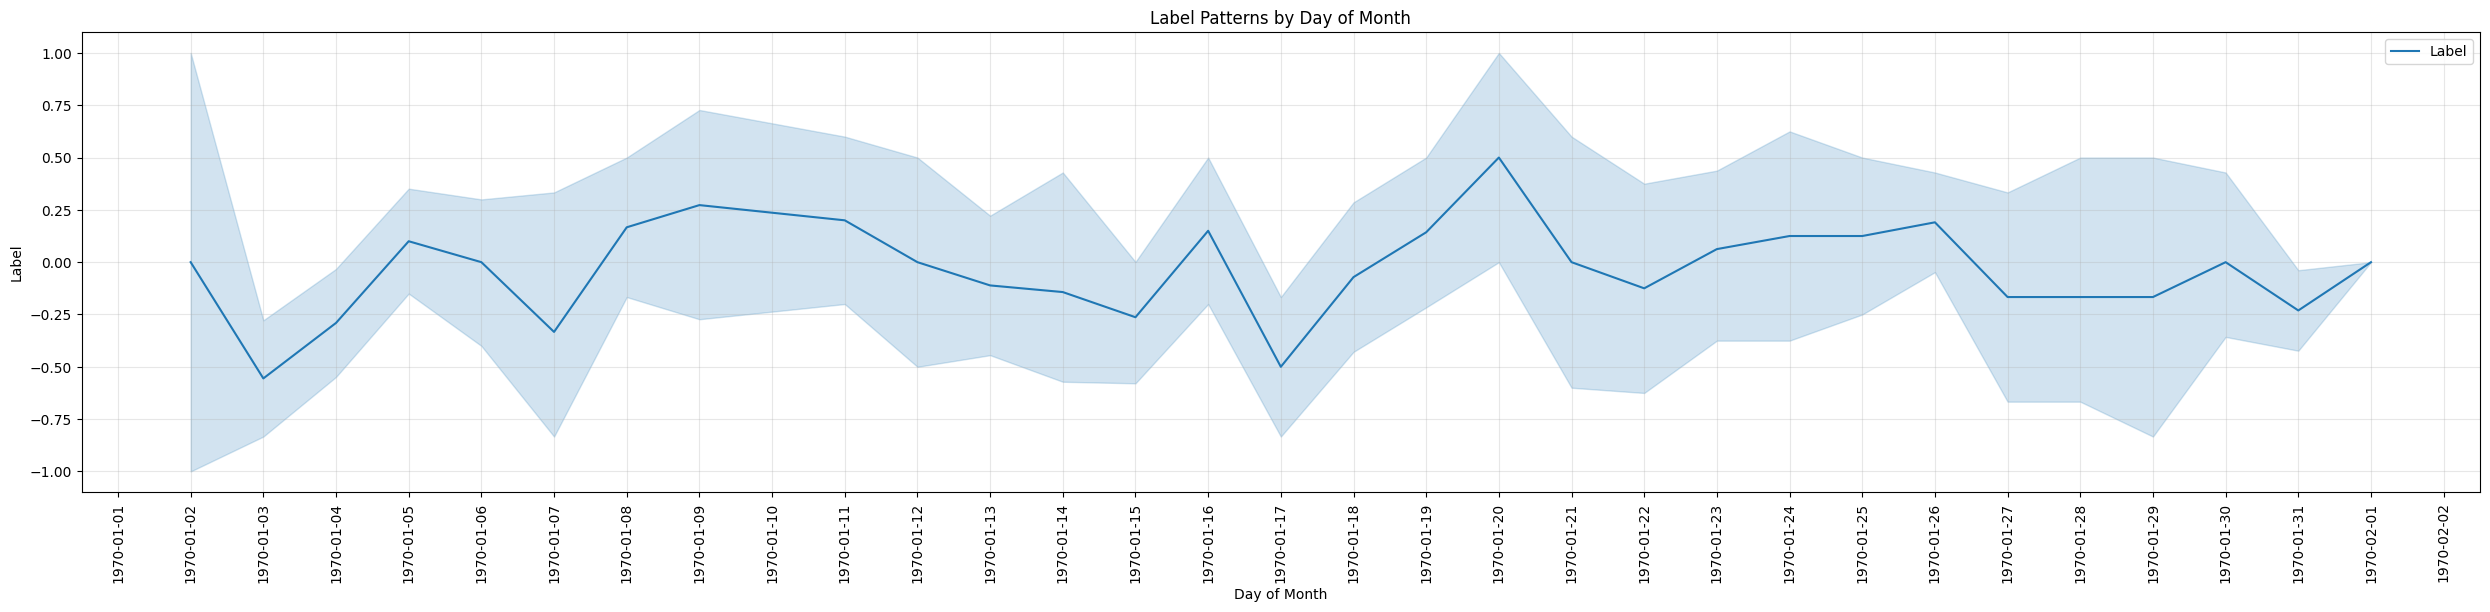

In [ ]:
news_1['Day'] = news_1['Date'].dt.day       # Extract day of month from Date
plt.figure(figsize=(25, 6))       # change Size of plot

# Plot all four prices
sns.lineplot(data=news_1, x='Day', y='Label', label='Label')

# Show every date on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)       # Rotate x-axis labels for better readability
plt.grid(True, alpha=0.3)     # Add grid for better readability
plt.tight_layout()          # Adjust layout to prevent label cutoff

# Customize the plot
plt.title('Label Patterns by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Label')

#### NOTES:
- Hypothesis about manipulative news Narrative is not supoprted: sentiment changes during the course of the month  but not in a way that would explain monthly swings of prices in the first half of the month  
- Prices change in the first half of the month drastically for reasons beyond news sentiments
- But maket remains receptive to the news sentiment in the first half of the month and ignores news in the second half of the month

#### SUGGESTIONS:
- Given unknown nature but highly repetive patterns of price changes on specific days of each month I propose to center prices against prices predicted by:
  a) day of month
  b) long-term trend (overall growth over time)

### CENTERING PRICES

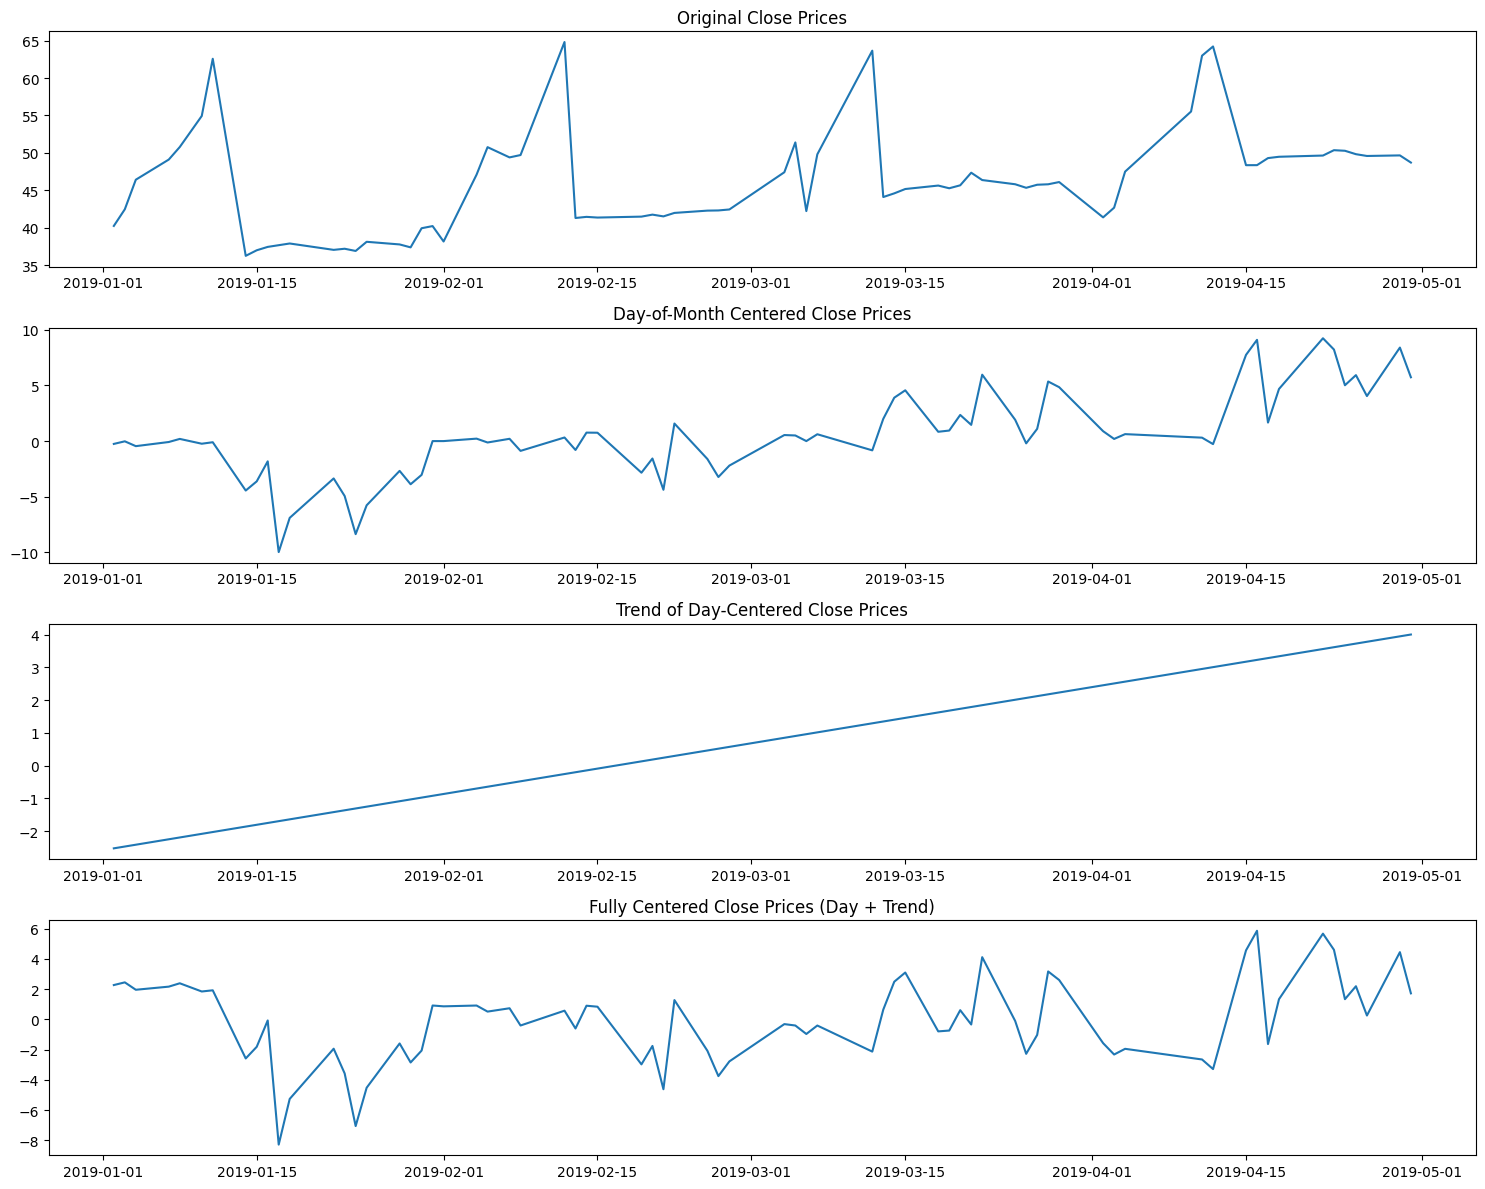


Verification of centering:

Open:
Day-centered mean: -0.0000
Fully centered mean: -0.0000

High:
Day-centered mean: 0.0000
Fully centered mean: -0.0000

Low:
Day-centered mean: 0.0000
Fully centered mean: -0.0000

Close:
Day-centered mean: 0.0000
Fully centered mean: -0.0000


In [ ]:
# 1. Center against day of month
# Calculate average price for each day of month
news_1['DayOfMonth'] = news_1['Date'].dt.day
daily_means = {}
centered_daily = {}
for price in ['Open', 'High', 'Low', 'Close']:
    daily_means[price] = news_1.groupby('DayOfMonth')[price].transform('mean')
    centered_daily[price] = news_1[price] - daily_means[price]
    news_1[f'{price}_DayCentered'] = centered_daily[price]

# 2. Calculate regression predictions as relative increments
news_1['DayNumber'] = (news_1['Date'] - news_1['Date'].min()).dt.days
fully_centered = {}

for price in ['Open', 'High', 'Low', 'Close']:
    # Fit linear trend to day-centered data
    X = news_1['DayNumber'].values.reshape(-1, 1)
    y = news_1[f'{price}_DayCentered'].values
    reg = LinearRegression().fit(X, y)

    # Calculate trend increments
    trend_increments = reg.predict(X)

    # Subtract trend increments from day-centered prices
    fully_centered[price] = news_1[f'{price}_DayCentered'] - trend_increments

    # Save as new column
    news_1[f'{price}_FullyCentered'] = fully_centered[price]

# Visualize the progression for Close price
plt.figure(figsize=(15, 12))

# Original prices
plt.subplot(4, 1, 1)
plt.plot(news_1['Date'], news_1['Close'])
plt.title('Original Close Prices')

# Day-centered prices
plt.subplot(4, 1, 2)
plt.plot(news_1['Date'], news_1['Close_DayCentered'])
plt.title('Day-of-Month Centered Close Prices')

# Trend of day-centered prices
plt.subplot(4, 1, 3)
plt.plot(news_1['Date'], reg.predict(X))
plt.title('Trend of Day-Centered Close Prices')

# Fully centered prices
plt.subplot(4, 1, 4)
plt.plot(news_1['Date'], news_1['Close_FullyCentered'])
plt.title('Fully Centered Close Prices (Day + Trend)')

plt.tight_layout()
plt.show()

# Print verification statistics
print("\nVerification of centering:")
for price in ['Open', 'High', 'Low', 'Close']:
    print(f"\n{price}:")
    print(f"Day-centered mean: {news_1[f'{price}_DayCentered'].mean():.4f}")
    print(f"Fully centered mean: {news_1[f'{price}_FullyCentered'].mean():.4f}")

Correlations for Days 1-14:


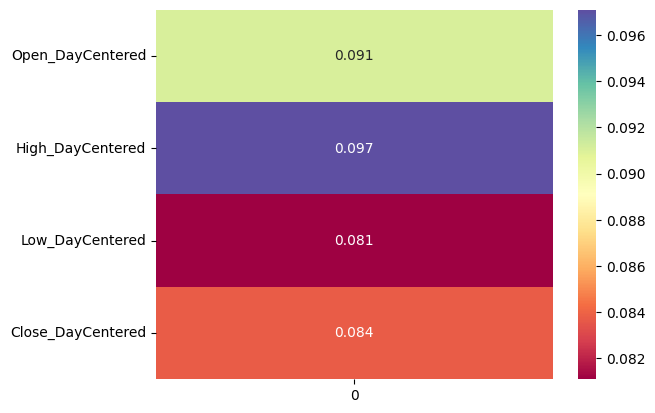

Correlations for Days 15-31:


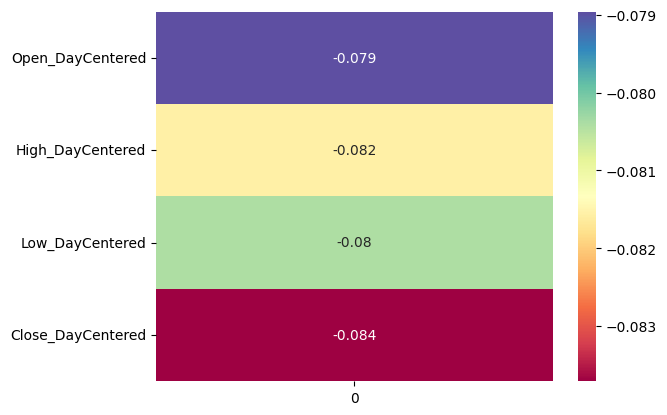

In [ ]:
# Create two separate dataframes for days 1-14 and 15-31
days_1_14 = news_1[news_1['Date'].dt.day <= 14].copy()
days_15_31 = news_1[news_1['Date'].dt.day > 14].copy()

# Show heatmap with coorelations between all day-centered prices and Label by 2 time periods
print("Correlations for Days 1-14:")
sns.heatmap(days_1_14[['Open_DayCentered','High_DayCentered','Low_DayCentered','Close_DayCentered']].corrwith(days_1_14['Label']).to_frame(), annot=True, cmap='Spectral');
plt.show()
print("Correlations for Days 15-31:")
sns.heatmap(days_15_31[['Open_DayCentered','High_DayCentered','Low_DayCentered','Close_DayCentered']].corrwith(days_15_31['Label']).to_frame(), annot=True, cmap='Spectral');
plt.show()

Correlations for Days 1-14:


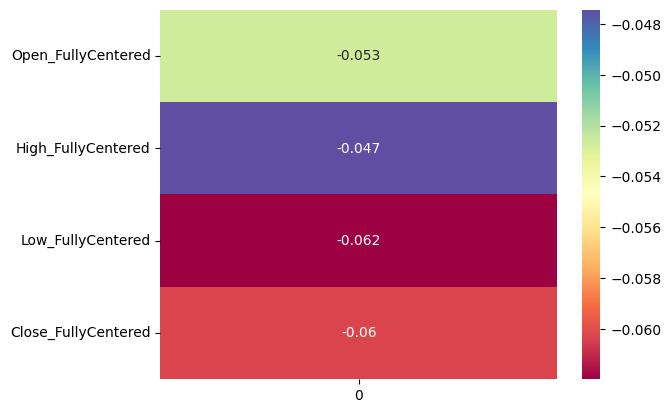

Correlations for Days 15-31:


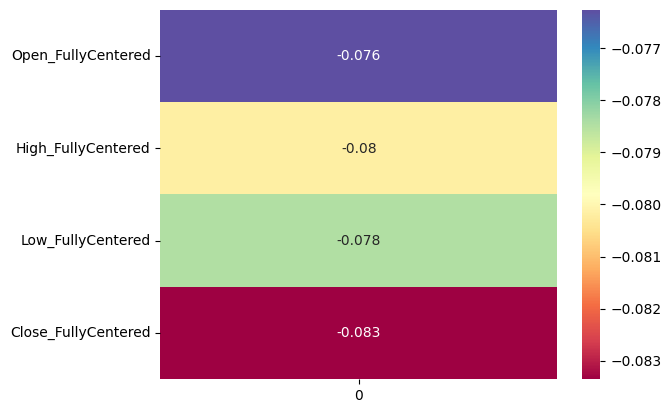

In [ ]:
# Create two separate dataframes for days 1-14 and 15-31
days_1_14 = news_1[news_1['Date'].dt.day <= 14].copy()
days_15_31 = news_1[news_1['Date'].dt.day > 14].copy()

# Show heatmap with coorelations between all fully centered prices and Label by 2 time periods
print("Correlations for Days 1-14:")
sns.heatmap(days_1_14[['Open_FullyCentered','High_FullyCentered','Low_FullyCentered','Close_FullyCentered']].corrwith(days_1_14['Label']).to_frame(), annot=True, cmap='Spectral');
plt.show()
print("Correlations for Days 15-31:")
sns.heatmap(days_15_31[['Open_FullyCentered','High_FullyCentered','Low_FullyCentered','Close_FullyCentered']].corrwith(days_15_31['Label']).to_frame(), annot=True, cmap='Spectral');
plt.show()

#### NOTES:
- None of the centring tranformations improved correlations but only made it worse

#### SUGGESTIONS:
- Drop all centering attempts and proceed with original prices

In [ ]:
news_1 = news_0.copy() #Return to original data
news_1['Date'] = pd.to_datetime(news_1['Date'])  # to convert 'Date' var to datetime format.
news_1["Date"].describe() #Show statistical summary of the 'Date' column

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


## **Data Preprocessing**

In [ ]:
# Define new fucntion fo cleaning and pre-processign text
ps = PorterStemmer()
def clean_text(text):
    text = text.lower()     # Convert to lowercase
    text = re.sub(r'[^A-Za-z\s]', '', text)     # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()      # Remove extra whitespaces
    words = text.split()      # Split text into separate words
    # Remove stopwords and stem what's left
    stop_words = set(stopwords.words('english'))
    words_no_stop = [word for word in words if word not in stop_words]
    text = ' '.join([ps.stem(word) for word in words_no_stop])      # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    # text = ' '.join(words_no_stop)     # Trying to Skipping Porter Stemmer above in order to check for gain in performance
    return text

In [ ]:
# Clean and prepare text
news_1['News_cln'] = news_1['News'].apply(clean_text)
news_1['News_cln'].head(10)

,News_cln
0,tech sector experienc signific declin aftermar...
1,appl lower fiscal q revenu guidanc billion ear...
2,appl cut fiscal first quarter revenu forecast ...
3,news articl report yield longdat us treasuri s...
4,appl revenu warn led declin usd jpi pair gain ...
5,appl ceo tim cook discuss compani q warn cnbc ...
6,roku inc announc plan offer premium video chan...
7,wall street saw modest gain wednesday threaten...
8,appl fiscal first quarter revenu came analyst ...
9,appl inc lower quarterli sale forecast fiscal ...


### Splittign Data
- Given temporal nature of data and given observed trend, it is better to allocate newer portion of data to Validation and Test
- Since there are 4 full months of data then split it as 75% / 25% would correspond approximately to "before April" and "just April" in 2019
- But given both 1) Drastic difference in price dynamics in the first half of the month vs in the second half and 2) Drastic difference in correlations of prices to sentiment in the first half of the month vs in the second half it is important to ensure that both first half of the April vs the second half of April are equally presented in Validation vs Test portion of data

Train set: 286 rows
Validation set: 31 rows
Test set: 32 rows


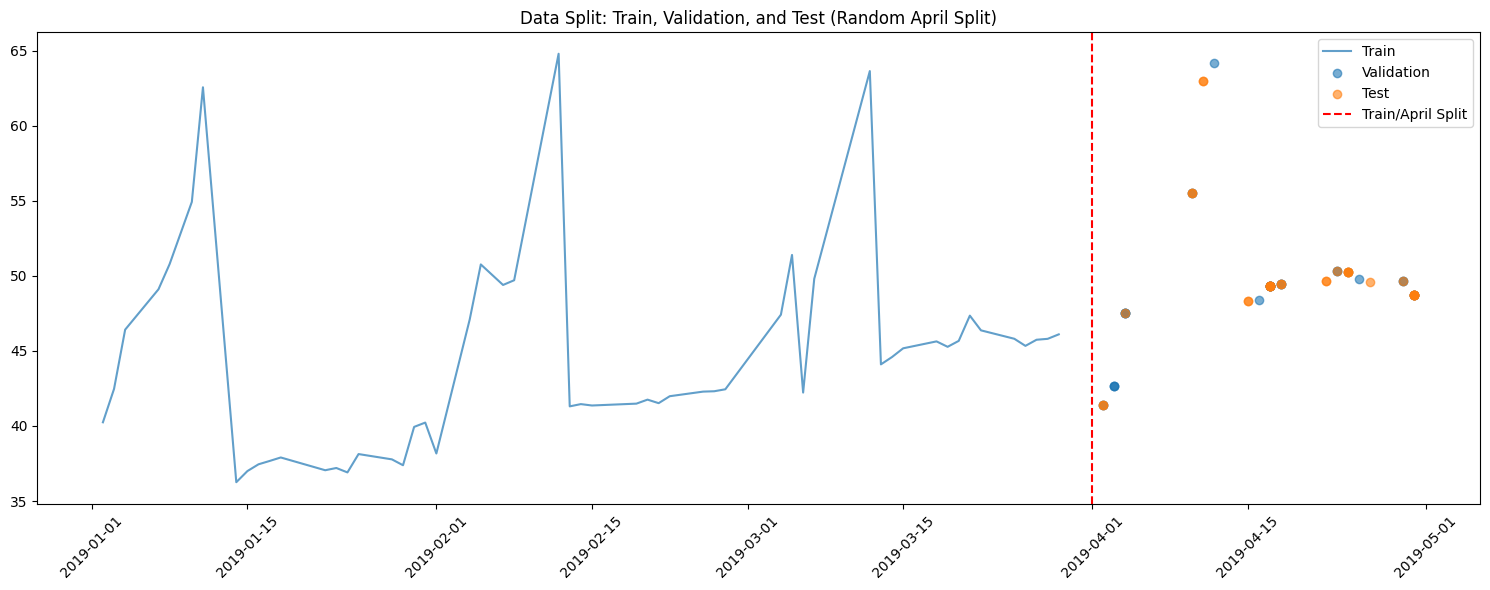


Validation date range: 2019-04-02 00:00:00 to 2019-04-30 00:00:00
Test date range: 2019-04-02 00:00:00 to 2019-04-30 00:00:00


In [ ]:
X_train = news_1[(news_1['Date'] < '2019-04-01 00:00:00')].reset_index()    #Take the 'Date' = before '2019-04-01' as Train data
X_val, X_test = train_test_split(news_1[news_1['Date'] >= '2019-04-01 00:00:00'].copy(), test_size=0.5, random_state=647) # Split April data As Validation vs Test art random 50/50

# Reset indices
X_val = X_val.reset_index()
X_test = X_test.reset_index()

# Print the sizes to verify the split
print(f"Train set: {len(X_train)} rows")
print(f"Validation set: {len(X_val)} rows")
print(f"Test set: {len(X_test)} rows")

# Visualize the splits
plt.figure(figsize=(15, 6))
plt.plot(X_train['Date'], X_train['Close'], label='Train', alpha=0.7)
plt.scatter(X_val['Date'], X_val['Close'], label='Validation', alpha=0.6)
plt.scatter(X_test['Date'], X_test['Close'], label='Test', alpha=0.6)
plt.axvline(x=pd.to_datetime('2019-04-01'), color='r', linestyle='--', label='Train/April Split')
plt.title('Data Split: Train, Validation, and Test (Random April Split)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Verify that both val and test contain full April range
print("\nValidation date range:", X_val['Date'].min(), "to", X_val['Date'].max())
print("Test date range:", X_test['Date'].min(), "to", X_test['Date'].max())

In [ ]:
# Select Target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [ ]:
# Verify Resulting shapes
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 10)
Validation data shape (31, 10)
Test data shape  (32, 10)
Train label shape (286,)
Validation label shape (31,)
Test label shape  (32,)


## **Word Embeddings**

### **Word2Vec**

Define Word2Vec parameters

In [ ]:
# List all words in our data
all_words = [word.split(" ") for word in news_1['News_cln'].values]
# Creating Word2Vec
vec_size = 300
model_W2V = Word2Vec(all_words, vector_size = vec_size, min_count = 1, window=5, workers = 6)

print("Words in vocabulary:", len(list(model_W2V.wv.key_to_index)))    # Show size of the vocabulary

Words in vocabulary: 2497


#### NOTES:
- There are 4682 words in total

In [ ]:
model_W2V.wv["stock"] # Checking the word embedding of a random word

array([-5.25147980e-03,  1.24562625e-02,  1.12241437e-03,  4.56182379e-03,
        2.45987700e-04, -1.31932786e-02,  8.24869238e-03,  2.00998038e-02,
        3.10539827e-03, -3.76383145e-03,  6.79084624e-04, -8.30886234e-03,
        2.36758264e-03, -3.83182219e-03, -6.12498261e-03, -6.64483616e-03,
        6.81432197e-03, -1.59030652e-03, -1.14770330e-04, -1.52068678e-03,
       -5.20967133e-03, -1.41248293e-03,  1.07272696e-02,  5.54535026e-03,
        6.07955316e-03,  1.18445663e-03, -8.91297311e-03,  1.05831225e-03,
       -5.64699061e-03, -1.03169391e-02,  3.43722338e-03, -4.26972378e-03,
       -1.61800580e-03, -2.59138411e-04, -1.83232850e-03,  4.24722256e-03,
        6.12334674e-03, -1.29168509e-02, -3.33881658e-03,  3.44667351e-03,
       -3.23336036e-03,  1.43168983e-03,  1.55475887e-03, -8.30518454e-03,
        7.42865447e-03,  1.04201464e-02,  4.99778753e-03,  1.59959169e-03,
       -2.73111765e-03,  7.01938197e-03,  4.41881921e-03,  7.56219204e-04,
       -6.36558980e-03, -

In [ ]:
model_W2V.wv["trade"] # Checking the word embedding of a random word

array([-1.96388038e-03,  1.02244699e-02,  4.57090465e-03,  7.99025781e-03,
       -3.96990590e-03, -8.56775232e-03,  4.46991948e-03,  1.59339178e-02,
        8.66533257e-04,  1.33158185e-03, -6.75409683e-04, -7.67912669e-03,
        4.03118739e-03, -1.47667318e-03, -1.00576971e-02, -7.36539252e-03,
        5.66651626e-03, -1.95676042e-03,  1.68668514e-03, -2.13024300e-03,
       -6.03473140e-03, -2.65993434e-03,  5.78249106e-03,  2.37401715e-03,
        9.18958895e-03,  2.67077191e-03, -1.17844995e-02,  7.38170813e-04,
       -3.19518591e-03, -8.53173155e-03,  4.90198983e-03, -4.24215943e-03,
        2.51996936e-03, -1.98887056e-03, -1.65736594e-03, -1.89458556e-03,
        1.67435501e-03, -1.29105831e-02, -9.36785073e-04, -1.83854706e-03,
       -5.15749725e-03,  1.02780104e-04,  6.63232990e-04, -7.56710302e-03,
        1.58881722e-03,  6.47352077e-03,  3.75978486e-03,  8.65655951e-04,
       -4.90213698e-03,  6.92144828e-03,  4.81842412e-03,  2.62578181e-03,
       -6.36752835e-03,  

In [ ]:
print(model_W2V.wv.similar_by_word('appl', topn=3))      # Checking top 3 similar words to the word 'apple'

[('compani', 0.950221836566925), ('report', 0.9379173517227173), ('due', 0.9365056753158569)]


### Combine all words and vectors into 1 dictionary

In [ ]:
words = list(model_W2V.wv.key_to_index.keys())      # Get all words present in the Word2Vec vocabulary
wvs = model_W2V.wv[words].tolist()        # Get vectors for all the words present in vocabulary
word_vector_dict = dict(zip(words, wvs))      # Create a dictionary of words and their corresponding vectors

### Define a function that vectorize each sentence

In [ ]:
def W2V_vectorizer(text):
    text_vector = np.zeros((vec_size,), dtype="float64")     # Initialize zeroes in vector for the text
    words_vocab = [word for word in text.split() if word in words]     # Get words in text that are present in the model vocabulary
    for word in words_vocab:
        text_vector += np.array(word_vector_dict[word])      # cumulatively add vectors of each word
    if len(words_vocab) != 0:
        text_vector /= len(words_vocab)     # Divide by num of vectors to get average
    return text_vector

### Process each News using Word2Vec vectorizer

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()  # initialize time

X_train_wv = pd.DataFrame(X_train["News_cln"].apply(W2V_vectorizer).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News_cln"].apply(W2V_vectorizer).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News_cln"].apply(W2V_vectorizer).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time() # measure time lapsed
print('Time taken ', (end-start))
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

Time taken  0.32175731658935547
(286, 300) (31, 300) (32, 300)


#### NOTES:
- Each news gets a 300-dimensional vector

### **Glove**
### Prepare GloVe Input file

In [ ]:
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

### Load Glove

In [ ]:
glove_model = KeyedVectors.load_word2vec_format('glove.6B.100d.txt.word2vec', binary=False)     # load the GloVe model

In [ ]:
print("Length of the vocabulary is", len(glove_model.index_to_key))     # Check the size of the vocabulary

Length of the vocabulary is 400000


In [ ]:
glove_model['stock']      # Random checking of word embeddings

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
glove_model['trade']      # Random checking of word embeddings

array([ 0.37445 ,  0.2905  ,  0.52087 , -0.078068,  0.30331 , -1.6431  ,
       -0.55616 , -0.24898 ,  0.44383 , -0.99393 , -0.73201 , -0.79459 ,
        0.43296 ,  0.04844 ,  0.43213 ,  0.39854 ,  0.3002  , -0.36644 ,
       -0.71495 , -0.86286 ,  0.76708 ,  0.34937 ,  0.15718 ,  0.057662,
        0.56727 , -0.19785 ,  0.09236 , -0.94945 , -0.13466 , -0.052757,
       -0.82318 ,  0.68548 ,  0.07743 , -0.37814 , -0.39726 ,  0.12131 ,
        0.38462 , -0.43321 , -0.46539 , -0.07565 , -0.42237 , -1.1531  ,
        0.50071 ,  0.16092 ,  0.20233 , -0.57431 , -0.3286  , -0.095848,
       -0.35717 , -0.94171 ,  0.23192 ,  0.7344  , -0.49079 ,  0.59564 ,
       -0.28278 , -1.7117  , -0.44678 , -0.2318  ,  2.3063  ,  0.96044 ,
       -1.0516  , -0.26582 , -0.85635 , -0.44865 , -0.49    , -0.56414 ,
        0.49853 ,  0.14188 ,  0.97041 , -0.5719  ,  0.27742 , -0.46931 ,
       -0.30826 , -0.80948 , -0.25205 , -0.57841 , -0.97876 ,  0.035568,
       -1.5801  ,  0.41414 ,  0.67212 ,  0.79825 , 

### Combine GloVe words and their vectors into 1 dictionary

In [ ]:
glove_words = glove_model.index_to_key      # get words present in the GloVe vocabulary
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))      # Make a dictionary of these words + their vectors

In [ ]:
vec_size=100 # define vector size

### Define a function that vectorizes each News (GloVE)

In [ ]:
    def GloVe_vectorizer(text):
          text_vector = np.zeros((vec_size,), dtype="float64")     # Initialize zeroes in vector for the text
          words_vocab = [word for word in text.split() if word in glove_words]     # Get words in text that are present in the model vocabulary
          for word in words_vocab:
              text_vector += np.array(glove_word_vector_dict[word])      # cumulatively add vectors of each word
          if len(words_vocab) != 0:
              text_vector /= len(words_vocab)     # Divide by num of vectors to get average
          return text_vector

### Process each News by GloVe vectorizer

In [ ]:
# creating a dataframe of the vectorized news
start = time.time()

X_train_gl = pd.DataFrame(X_train["News_cln"].apply(GloVe_vectorizer).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_gl = pd.DataFrame(X_val["News_cln"].apply(GloVe_vectorizer).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_gl = pd.DataFrame(X_test["News_cln"].apply(GloVe_vectorizer).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  21.88862133026123


In [ ]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)      # Verify resulting Shapes

(286, 100) (31, 100) (32, 100)


#### NOTES:
- Each news gets a 100-dimensional vector

### **Sentence Transformer**
### Define Sentence Transformer

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')     #Defining the model

### Vectorize sentences / news by Sentence Tranformer model

#### Define what to use for computations

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # instructing to use GPU if available as device, or else - CPU

In [ ]:
# encoding the news
start = time.time()

X_train_st = model.encode(X_train["News_cln"].values, show_progress_bar=True, device=device) # Apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News_cln"].values, show_progress_bar=True, device=device) # Apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News_cln"].values, show_progress_bar=True, device=device) # Apply Sentence Transformer on 'News' column

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Time taken  4.245863199234009


In [ ]:
print(X_train_st.shape, X_val_st.shape, X_test_st.shape)      # Verify resulting Shapes

(286, 384) (31, 384) (32, 384)


#### NOTES:
- Each news gets a 384-dimensional vector

## **Sentiment Analysis**

### **Utility Functions**
### Function for plotting Confusion Matrix

In [ ]:
# defining a function to plot a confusion matrix
def plot_confusion_matrix(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Define size of chart.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)  # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

#### Fucntion measuring classification model performance

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Parameters:
    model:  which sklearn classifier
    predictors: Independent variables
    target: Dependent variable or true labels
    Returns: pandas.DataFrame:  with Accuracy, Recall, Precision, F1-score.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

### **Model Building**
### Word2Vec Base Model

In [ ]:
# Building the model

base_wv = GradientBoostingClassifier(random_state = 647)
#base_wv = RandomForestClassifier(random_state=647)
#base_wv = DecisionTreeClassifier(random_state=647)


base_wv.fit(X_train_wv, y_train)      # Fit train data

GradientBoostingClassifier(random_state=647)

#### Evaluate Word2Vec Base Model

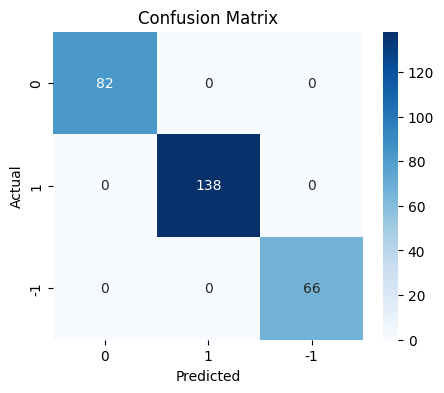

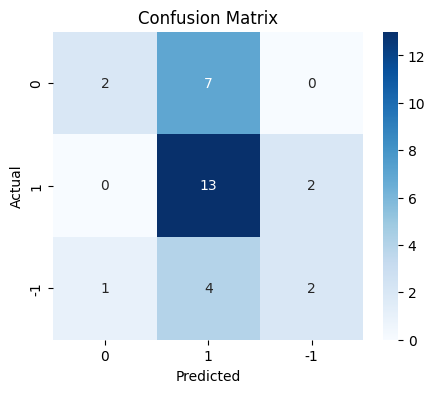

In [ ]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)
plt.show()
print('')
plot_confusion_matrix(base_wv,X_val_wv,y_val)
plt.show()

#### NOTES:
- Perfect fit on train Data (overfit)
- Bad fit on Validation Data

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.548387  0.548387   0.568548  0.501466


#### NOTES:
- Overfit on Train Data
- Unacceptable Performance on Test Data

### GloVe Base Model

In [ ]:
# Building the model

base_gl = GradientBoostingClassifier(random_state = 647)
#base_gl = RandomForestClassifier(random_state=647)
#base_gl = DecisionTreeClassifier(random_state=647)


base_gl.fit(X_train_gl, y_train)      # Fit train data

GradientBoostingClassifier(random_state=647)

#### Evaluate GloVe Base Model

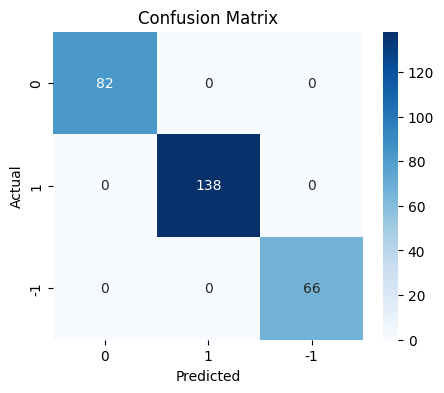

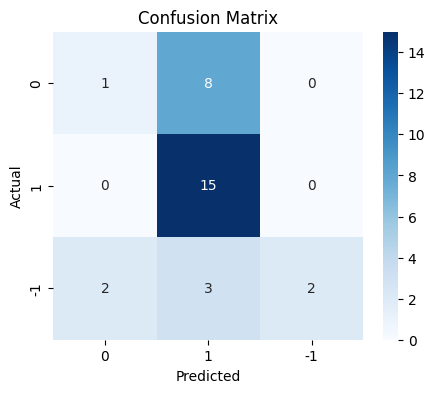

In [ ]:
#Plot Confusion Matrix
plot_confusion_matrix(base_gl,X_train_gl,y_train)
plt.show()
print('')
plot_confusion_matrix(base_gl,X_val_gl,y_val)
plt.show()

In [ ]:
#Calculating different metrics on training / validation data
base_train_gl=model_performance_classification_sklearn(base_gl,X_train_gl,y_train)
base_val_gl=model_performance_classification_sklearn(base_gl,X_val_gl,y_val)
print("Training performance:\n", base_train_gl)
print('')
print("Validation performance:\n", base_val_gl)


Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.580645  0.580645   0.601737  0.502797


#### NOTES:
- Still Overfit situation but better than Word2Vec










### Sentence Transformer Base Model

In [ ]:
# Building the model

base_st = GradientBoostingClassifier(random_state = 647)
#base_st = RandomForestClassifier(random_state=647)
#base_st = DecisionTreeClassifier(random_state=647)


base_st.fit(X_train_st, y_train)      # Fit train data

GradientBoostingClassifier(random_state=647)

#### Evaluate Sentence Transformer Base Model

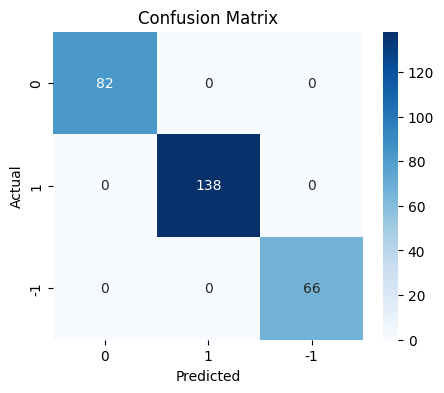

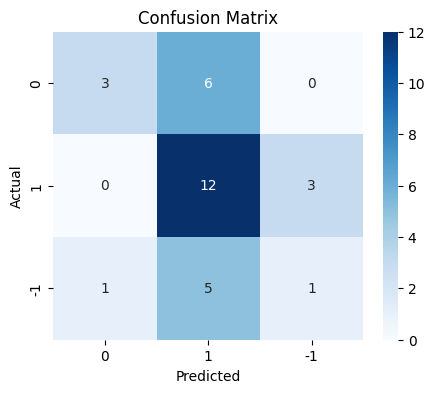

In [ ]:
#Plot Confusion Matrix
plot_confusion_matrix(base_st,X_train_st,y_train)
plt.show()
print('')
plot_confusion_matrix(base_st,X_val_st,y_val)
plt.show()

In [ ]:
#Calculating different metrics on training / validation data
base_train_st=model_performance_classification_sklearn(base_st,X_train_st,y_train)
base_val_st=model_performance_classification_sklearn(base_st,X_val_st,y_val)
print("Training performance:\n", base_train_st)
print('')
print("Validation performance:\n", base_val_st)


Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.516129  0.516129   0.526648  0.480653


### **TUNED MODELS**

### Word2Vec Tuned Model

In [ ]:
start = time.time()

tuned_wv = GradientBoostingClassifier(random_state = 647)
#tuned_wv = RandomForestClassifier(random_state=647)
#tuned_wv = DecisionTreeClassifier(random_state=647)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,8,10),
    'max_features': ['sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  147.39375376701355


In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

GradientBoostingClassifier(max_features='sqrt', min_samples_split=5,
                           random_state=647)

#### Evaluate Word2Vec Tuned Model

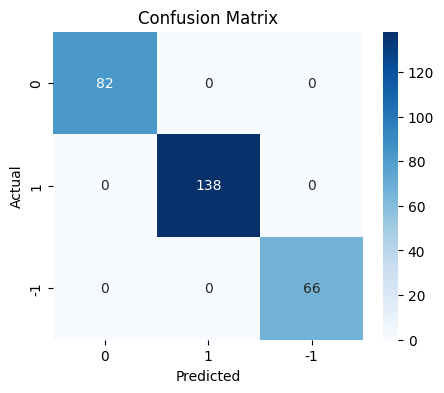

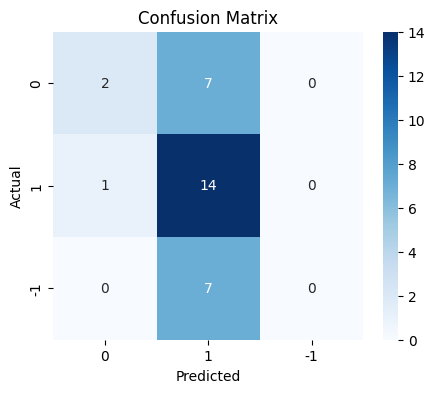

In [ ]:
# Plot Confusion Matrix for Train and Validation Data
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)
plt.show()
print('')
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)
plt.show()

In [ ]:
#Calculating different metrics on training / validation data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
tuned_val_wv=model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Training performance:\n",tuned_train_wv)
print('')
print("Validation performance:\n",tuned_val_wv )

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.516129  0.516129   0.435484  0.411853


#### NOTES:
- Performance of Tuned Word2Vec Model did not improve

### GloVe Tuned Model

In [ ]:
start = time.time()


tuned_gl = GradientBoostingClassifier(random_state = 647)
#tuned_gl = RandomForestClassifier(random_state=647)
#tuned_gl = DecisionTreeClassifier(random_state=647)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,8,10),
    'max_features': ['sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_gl, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  71.08005571365356


In [ ]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train)

GradientBoostingClassifier(max_depth=4, max_features='sqrt',
                           min_samples_split=5, random_state=647)

#### Evaluating GloVe Tuned Model

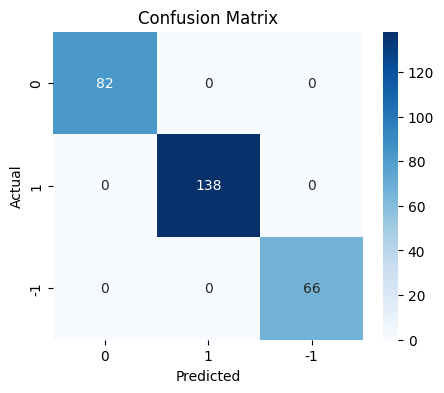

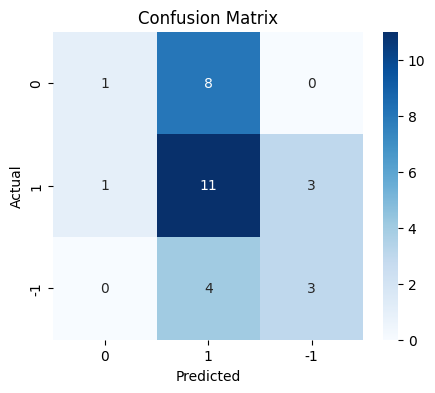

In [ ]:
# Plot Confusion Matrix for Train and Validation Data
plot_confusion_matrix(tuned_gl,X_train_gl,y_train)
plt.show()
print('')
plot_confusion_matrix(tuned_gl,X_val_gl,y_val)
plt.show()

In [ ]:
#Calculating different metrics on training / validation data
tuned_train_gl=model_performance_classification_sklearn(tuned_gl,X_train_gl,y_train)
tuned_val_gl=model_performance_classification_sklearn(tuned_gl,X_val_gl,y_val)
print("Training performance:\n", tuned_train_gl)
print('')
print("Validation performance:\n", tuned_val_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Validation performance:
    Accuracy    Recall  Precision       F1
0  0.483871  0.483871   0.489481  0.43714


#### NOTES:
- Grid Search did not improve perrformance

### Sentence Transformer Tuned Model

In [ ]:
start = time.time()


tuned_st = GradientBoostingClassifier(random_state = 42)
#tuned_st = RandomForestClassifier(random_state=42)
#tuned_st = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,8,10),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_st, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  191.25531196594238


In [ ]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train)

GradientBoostingClassifier(max_features=0.4, min_samples_split=5,
                           random_state=42)

#### Evaluate Sentence Transformer Tuned Model

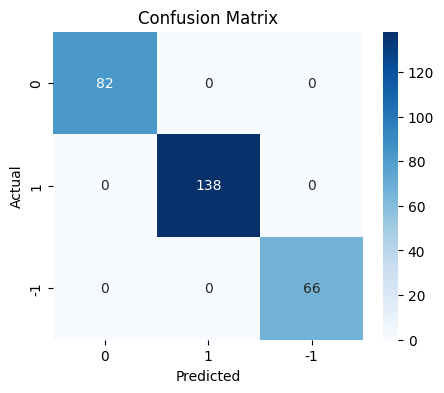

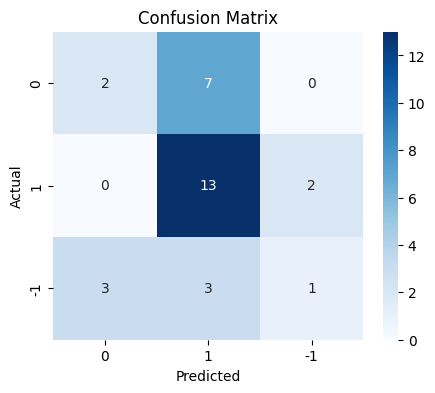

In [ ]:
# Plot Confusion Matrix for Train and Validation Data
plot_confusion_matrix(tuned_st,X_train_st,y_train)
plt.show()
print('')
plot_confusion_matrix(tuned_st,X_val_st,y_val)
plt.show()

In [ ]:
#Calculating different metrics on training / validation data
tuned_train_st=model_performance_classification_sklearn(tuned_st,X_train_st,y_train)
tuned_val_st=model_performance_classification_sklearn(tuned_st,X_val_st,y_val)
print("Training performance:\n", tuned_train_st)
print('')
print("Validation performance:\n", tuned_val_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Validation performance:
    Accuracy    Recall  Precision       F1
0  0.516129  0.516129    0.46489  0.45918


#### NOTES:
- Model Performance did not improve

### **Model Performance Summary and Final Model Selection**

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0,1.0,1.0
F1,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
    ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.548387,0.580645,0.516129,0.516129,0.483871,0.516129
Recall,0.548387,0.580645,0.516129,0.516129,0.483871,0.516129
Precision,0.568548,0.601737,0.526648,0.435484,0.489481,0.464890
F1,0.501466,0.502797,0.480653,0.411853,0.437140,0.459180


#### NOTES:
- Based on all Validation Preformance parameters, the model "Base Glove" is better
- Training Performance parameters are all overfit and do not differentiate models

### **Final Model Performance Check on Test Data**

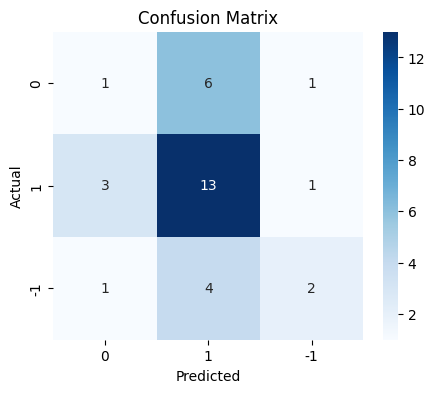

In [ ]:
plot_confusion_matrix(base_gl,X_test_gl,y_test)


In [ ]:
# Reporting the final model performance on test data
final_model_test = model_performance_classification_sklearn(base_gl,X_test_gl,y_test) #T he final model's performance for the test data
print("Test performance for the final model:\n",final_model_test)

Test performance for the final model:
    Accuracy  Recall  Precision        F1
0       0.5     0.5   0.459647  0.463319


#### NOTES:
- Performance of the best model is still low at ~50%
- this might be due to low sample size and sparce data situation leading to overfit and smaller room for reguralization

## **Weekly News Summarization**

**Important Note**: We run this section independently from the previous sections in order to avoid runtime crashes.

#### Installing and Importing the necessary libraries

In [ ]:
# !pip uninstall llama-cpp-python -y  # Remove any existing installation
!pip uninstall cmake -y             # Remove existing cmake
!pip install cmake                  # Install fresh cmake

Found existing installation: cmake 3.31.2
Uninstalling cmake-3.31.2:
  Successfully uninstalled cmake-3.31.2
  Using cached cmake-3.31.2-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.5 kB)
Using cached cmake-3.31.2-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (27.8 MB)


In [ ]:
# Install with CUDA support specifically for Colab T4 with GPU:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.27 --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 213.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 235.3 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.27-cp310-cp310-linux_x86_64.whl size=8182033 sha256=b53653aba96c2e33698ce9109a5f1c4ca0150ea2cbbe7977608e6913c539e369
  Stored in directory: /tmp/pip-ephem-wheel-cache-pjn_bygt/wheels/8c/92/37/ada3fcfdf537bab790219920443164923e6cbfcbd80174af23
Successfully built llama-cpp-python


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

#### Connecting Goggle Drive

In [ ]:
from google.colab import drive
drive.mount('/H', force_remount=True)

Mounted at /H


#### Changing working folder

In [ ]:
%cd /H/My Drive/AIML Work/Project - Stock Market News Sentiment Analysis and Summarization

/H/My Drive/AIML Work/Project - Stock Market News Sentiment Analysis and Summarization


#### Reading Data

In [ ]:
news_0 = pd.read_csv("stock_news.csv") # Read the CSV file.
news_1 = news_0.copy() #Preserve Original & create a copy of the data

#### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
llm = Llama(
    model_path=model_path, # Path to the model where the GGUF model file is stored
    n_gpu_layers=100, #Number of layers transferred to GPU - good for T4 GPU, ensures most layers run on GPU
    n_ctx=4500, #Context window for longer texts
)

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


#### Aggregating the data weekly

In [ ]:
news_1["Date"] = pd.to_datetime(news_1['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = news_1.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
# Concatenate News with a special separator
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


#### NOTES:
- Resulting dataframe has 18 records (weeks) and 1 ggregated news column

#### Check Grouped Weekly Data

In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
news_w = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

Here, we define the prompt to be fed to the LLM to help it understand the task to perform. The following are the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output


**Full Prompt**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Expected Output Example**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=512,  #Reasonable length for news analysis responses
      temperature=0.7, # Balanced between creativity and consistency
      top_p=0.9, # Allow some variability but maintain coherence
      top_k=40, # Standard value for focused but diverse responses
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

###

##### Checking the model output on a sample

In [ ]:
news = news_w.loc[0, 'News']  # taking News column

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

### Process all Aggregated News by LLM

##### Setting the prompt to LLM processing

In [ ]:
prompt = """
Role: You are an expert data analyst specializing in news content analysis.
Task: Analyze the provided news headline and return the main topics contained within it.
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
Important: Do not include any other text in the output except the JSON.
"""

In [ ]:
%%time
news_w['Key Events'] = news_w['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

100%|██████████| 18/18 [18:30<00:00, 61.68s/it]

CPU times: user 18min 34s, sys: 872 ms, total: 18min 35s
Wall time: 18min 30s


#### Checking the model output on the weekly data

In [ ]:
news_w["Key Events"].head(5) #Print the first 5 rows of the 'Key_Events' column

,Key Events
0,"[\n {\n ""topic_1"": ""Apple's Q..."
1,"{\n ""1"": ""5G smartphones: Sprint and..."
2,"{\n ""1"": ""U.S. stock market decline""..."
3,"{\n ""1"": ""Swiss National Bank (SNB) an..."
4,"[\n {\n ""topic_1"": ""Caterpill..."


#### NOTES:
- Despite strict Prompt instructions, LLM failed to adhere to JSON output only and added extra chat data and empty rows to it

##### Formatting the model output

In [ ]:
news_w['model_response_parsed'] = news_w['Key Events'].apply(extract_json_data)
news_w.head()

Error parsing JSON: Extra data: line 4 column 11 (char 167)
Error parsing JSON: Extra data: line 4 column 11 (char 240)
Error parsing JSON: Extra data: line 4 column 10 (char 90)
Error parsing JSON: Extra data: line 4 column 9 (char 203)
Error parsing JSON: Extra data: line 4 column 12 (char 219)
Error parsing JSON: Extra data: line 4 column 12 (char 224)
Error parsing JSON: Extra data: line 3 column 10 (char 64)
        {
          "topic_1": "Foxconn, Terry Gou, Business Diversification",
          "topic_2": "Amazon, Free Music Streaming",
          "topic_3": "Apple, Qualcomm, Patent Dispute",
          "topic_4": "Taiwan Business Tycoon, Elections, KMT Party",
          "topic_5": "Chinese App, TikTok, India, Google Play Store, Apple App Store",
          "topic_6": "TomTom, HD Maps, Carmakers, First Quarter Revenue",
          "topic_7": "S&P 500, Tech Stocks, Qualcomm, Legal Victory against Apple",
          "topic_8": "Aeva Inc, Autonomous Driving Unit, AID Autonomous Intellige

,Date,News,Key Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"[\n {\n ""topic_1"": ""Apple's Q...",{'topic_1': 'Apple's Q1 revenue warning and it...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""1"": ""5G smartphones: Sprint and...",{'1': '5G smartphones: Sprint and Samsung plan...
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""1"": ""U.S. stock market decline""...","{'1': 'U.S. stock market decline', '2': 'Globa..."
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""1"": ""Swiss National Bank (SNB) an...",{'1': 'Swiss National Bank (SNB) and negative ...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"[\n {\n ""topic_1"": ""Caterpill...",{'topic_1': 'Caterpillar Inc's lower-than-expe...


#### NOTES:
- As expected this  extra text derails JSON processing

In [ ]:
model_response_parsed = pd.json_normalize(news_w['model_response_parsed'])
model_response_parsed.head()

,topic_1,topic_2,topic_3,topic_4,1,2,3,4,5,6,...,13,14,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12
0,Apple's Q1 revenue warning and its impact on t...,Global economic slowdown concerns following Ap...,Safe haven assets like gold and Japanese yen g...,Impact of US-China trade tensions on company p...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,5G smartphones: Sprint and Samsung planning re...,AMS developing new 3D facial recognition featu...,Deutsche Bank upgrades Universal Music Group v...,Amazon stock predicted to surge by over 20% by...,AMS partnering with Chinese software maker Fac...,Geely forecasts flat sales for 2019 due to eco...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,U.S. stock market decline,Global economic slowdown concerns,Chinese exports and imports drop,Tech stocks suffering losses,Philadelphia SE Semiconductor Index fall,European stock market halt and sell-off,...,US-China trade talks and potential tariff roll...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Swiss National Bank (SNB) and negative interes...,"Stock market losses (Dow, S&P 500, Nasdaq)",IBM's better-than-expected earnings and revenue,Huawei's new Honor View20 smartphone launch,Foxconn recruitment drive and mass layoffs,Amazon's direct fulfillment and delivery netwo...,...,U.S.-China trade disputes and Starbucks sales ...,Mastercard's continued pursuit of a bankcard c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Caterpillar Inc's lower-than-expected earnings...,Apple's spending with US suppliers and jobs ge...,Apple's expected lower-than-projected fiscal f...,China's smartphone shipments decline and marke...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Gold price increase due to upcoming macro even...,CVS Health's new health app for Apple Watches ...,Apple's FaceTime bug issue and software patch ...,"Collaboration between Apple, Aetna, and CVS on...",Corning's higher-than-expected revenue and pro...,Price of gold reaching an eight-month high due...,"Apple's weak iPhone sales, particularly in Chi...","Google's research app, Screenwise Meter, viola..."


In [ ]:
final_output = pd.concat([news_w.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

final_output.head()

## **Conclusions and Recommendations**

# **CONCLUSIONS**:
### ***Stock Price Dynamics***:

Stock prices exhibit a repetitive monthly pattern, particularly from the 1st to the 14th day, followed by increased variance in the latter half of the month.
The observed price fluctuations are not fully explained by sentiment or volume, suggesting the influence of external or hidden factors.

---

### ***Sentiment Analysis***:

Market sentiment shows limited correlation with price movements, especially in the second half of the month when the market appears less sensitive to news.
Neutral sentiments dominate the dataset, with balanced representation of positive and negative sentiments.

---
### ***Feature Engineering***:

Attempts to center prices based on monthly trends and long-term growth did not improve predictive performance.
Temporal patterns highlight the need for features that capture both daily and monthly cycles.

---
### ***Modeling Insights***:

Word embeddings like Word2Vec effectively capture semantic relationships but may benefit from further tuning to improve downstream tasks.
The data split ensures temporal consistency, critical for modeling trends influenced by time.

---


# **RECOMENDATIONS**:

### ***Model Improvement***:

Incorporate external data sources such as macroeconomic indicators or industry-specific events to capture hidden factors influencing stock prices.
Experiment with transformer-based models like BERT for sentiment analysis to potentially improve sentiment classification accuracy.

---
### ***Feature Engineering***:

Introduce lag features for volume and sentiment to explore delayed effects on stock prices.
Develop periodicity-aware features to capture monthly cycles more effectively.

---
### ***Data Strategy***:

Expand the dataset to include a longer time span and multiple companies for improved generalizability and robustness.
Perform stratified sampling for sentiment labels to address class imbalance.

---
### ***Analysis and Reporting***:

Investigate the impact of outliers and unexpected market events on price dynamics.
Provide confidence intervals or uncertainty estimates for model predictions to guide analysts better.

---
### ***Implementation***:

Deploy the final model in a user-friendly interface for financial analysts, allowing real-time sentiment tracking and price forecasting.
Schedule periodic retraining of models to adapt to evolving market conditions and sentiment trends.


